## Grupo 6 - Analítica de Datos

- Balarezo Ramos Luis Jesus
- Soller Barrenechea Carlos Javier  
- Callupe Arias Jefferson Jesus
- Lizarbe Estrada Adrian Jesus

In [160]:
# Librerías para análisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
import geopandas as gpd
import warnings

# Configuración de visualización
plt.style.use("dark_background")
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuración de pandas para mostrar más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Librerías importadas correctamente")

Librerías importadas correctamente


# Análisis Descriptivo Completo de Datos del Banco Mundial (WDI)

## Objetivos del Análisis
Realizar un análisis descriptivo comprehensivo de los datos del World Development Indicators (WDI) del Banco Mundial, con enfoque en:

### Indicadores Principales Analizados:
1. **PIB per cápita** (USD constantes 2015) - Indicador económico
2. **Esperanza de vida al nacer** (años) - Indicador social/salud
3. **Población total** - Contexto demográfico
4. **Emisiones CO2 per cápita** (toneladas métricas) - Indicador ambiental
5. **Exports de bienes y servicios** (% del PIB) - Indicador de comercio internacional
6. **Imports de bienes y servicios** (% del PIB) - Indicador de comercio internacional

### Países Objetivo del Análisis:
- **USA** (Estados Unidos), **CAN** (Canadá), **GBR** (Reino Unido), **JPN** (Japón)
- **SGP** (Singapur), **RUS** (Federación Rusa), **IND** (India), **CHN** (China)

### Estructura del Análisis:
1. **Exploración y preparación de datos** - Carga, transformación y limpieza
2. **Análisis estadístico descriptivo** - Distribuciones, correlaciones y tendencias
3. **Visualización de datos** - Gráficos temporales, comparativos y de distribución
4. **Análisis específico de comercio internacional** - Exports e Imports por país
5. **Exportación para Power BI** - Dataset consolidado para análisis avanzado

### Cobertura Temporal:
- **Serie histórica completa**: 1960-2024 (65 años de datos)
- **Enfoque en años recientes**: 2015-2024 para análisis comparativo actual

## 1. Carga y Exploración Inicial de Datos

In [139]:
# Carga de datos del World Development Indicators
wdi = pd.read_csv("./data/WDICSV.csv")

print(f"Dimensiones del dataset: {wdi.shape[0]:,} filas x {wdi.shape[1]:,} columnas")
print(f"Estructura del dataset:")
print(f"   - Países: {wdi['Country Name'].nunique():,}")
print(f"   - Indicadores: {wdi['Indicator Name'].nunique():,}")
print(f"   - Años disponibles: {wdi.columns[4:].nunique()}")

# Muestra de los primeros registros
print("\nPrimeras 5 filas del dataset:")
wdi.head()


Dimensiones del dataset: 403,256 filas x 69 columnas
Estructura del dataset:
   - Países: 266
   - Indicadores: 1,516
   - Años disponibles: 65

Primeras 5 filas del dataset:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.460922,11.785469,12.119852,12.506167,12.890712,13.324145,13.790770,14.222859,14.649063,15.151686,15.615567,16.039882,16.520602,16.953688,17.488497,18.001597,18.558234,19.043572,19.586457,20.192064,20.828814,21.372164,22.100884,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.465235,3.638324,3.849663,4.058893,4.293539,4.502732,4.750627,5.016145,5.263236,5.487488,5.723223,6.003738,6.259134,6.526446,6.811504,7.096003,7.406706,7.666648,8.020952,8.403358,8.718306,9.097176,9.473374,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.192270,32.592996,33.036393,33.521439,34.043536,34.461126,35.039799,35.621788,35.991596,36.472377,36.788812,37.167308,37.521893,37.849572,38.152090,38.488233,38.779953,39.068462,39.445526,39.818645,40.276374,40.687817,41.211606,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.917256,19.944277,21.548647,22.493217,23.724455,23.449539,25.172482,26.795145,25.908845,26.187846,27.414954,28.909756,31.673427,31.723574,31.871956,33.922276,38.859598,40.223744,43.035073,44.390861,46.282371,48.127211,48.801258,50.668330,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.623663,NaN,NaN,9.785571,10.942222,10.440734,12.562725,12.514078,12.981138,15.549057,14.541253,16.158961,19.442860,18.775074,17.672943,16.527554,24.627753,25.432092,27.061929,29.154282,31.022083,32.809138,33.783960,35.375216,NaN


### Interpretación Inicial

Los datos del WDI contienen información histórica de múltiples países e indicadores económicos y sociales. La estructura original tiene los años como columnas, lo que requiere una transformación para facilitar el análisis temporal.


In [140]:
# Transformación de datos: pivotear años de columnas a filas
print("Transformando la estructura de datos...")
wdi_data = pd.melt(
    wdi, 
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year", 
    value_name="Value"
)

print(f"Datos transformados: {wdi_data.shape[0]:,} observaciones")
print(f"Estructura temporal: datos desde {wdi_data['Year'].min()} hasta {wdi_data['Year'].max()}")

# Visualización de la nueva estructura
print("\nEstructura transformada (primeras 5 filas):")
wdi_data.head()

Transformando la estructura de datos...
Datos transformados: 26,211,640 observaciones
Estructura temporal: datos desde 1960 hasta 2024

Estructura transformada (primeras 5 filas):


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,1960,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,1960,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,NaN


## 2. Limpieza y Validación de Datos

### Análisis de Calidad de los Datos

In [141]:
# Análisis temporal de los datos
años_únicos = wdi_data["Year"].unique()
print(f"Análisis Temporal:")
print(f"   - Número total de años: {len(años_únicos)}")
print(f"   - Año más antiguo: {wdi_data['Year'].min()}")
print(f"   - Año más reciente: {wdi_data['Year'].max()}")
print(f"   - Rango temporal: {int(wdi_data['Year'].max()) - int(wdi_data['Year'].min())} años")

# Verificar completitud temporal
print(f"\nCompletitud de datos temporales:")
rango_esperado = list(range(int(wdi_data['Year'].min()), int(wdi_data['Year'].max()) + 1))
años_faltantes = set(map(str, rango_esperado)) - set(años_únicos)
if años_faltantes:
    print(f"   ADVERTENCIA: Años faltantes: {sorted(años_faltantes)}")
else:
    print(f"   Serie temporal completa: todos los años están presentes")

Análisis Temporal:
   - Número total de años: 65
   - Año más antiguo: 1960
   - Año más reciente: 2024
   - Rango temporal: 64 años

Completitud de datos temporales:
   Serie temporal completa: todos los años están presentes


In [142]:
# Conversión de tipos de datos
print("Optimizando tipos de datos...")
wdi_data = wdi_data.astype({
    "Year": "int16",  # Más eficiente para años
    "Value": "float32"  # Suficiente precisión para valores económicos
})

print("Tipos de datos optimizados:")
print(wdi_data.dtypes)

# Verificar valores faltantes
print(f"\nAnálisis de valores faltantes:")
missing_stats = wdi_data.isnull().sum()
total_obs = len(wdi_data)
for col in missing_stats.index:
    if missing_stats[col] > 0:
        porcentaje = (missing_stats[col] / total_obs) * 100
        print(f"   - {col}: {missing_stats[col]:,} ({porcentaje:.1f}%)")
    else:
        print(f"   - {col}: Sin valores faltantes")

Optimizando tipos de datos...
Tipos de datos optimizados:
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
Year                int16
Value             float32
dtype: object

Análisis de valores faltantes:
   - Country Name: Sin valores faltantes
   - Country Code: Sin valores faltantes
   - Indicator Name: Sin valores faltantes
   - Indicator Code: Sin valores faltantes
   - Year: Sin valores faltantes
   - Value: 17,253,904 (65.8%)


In [143]:
# Análisis de cobertura geográfica
print(f"Análisis de Cobertura Geográfica:")
países_únicos = wdi_data["Country Name"].nunique()
códigos_únicos = wdi_data["Country Code"].nunique()

print(f"   - Países únicos: {países_únicos:,}")
print(f"   - Códigos únicos: {códigos_únicos:,}")

# Verificar consistencia entre nombres y códigos
if países_únicos == códigos_únicos:
    print(f"   Consistencia: cada país tiene un código único")
else:
    print(f"   ADVERTENCIA: Inconsistencia detectada entre nombres y códigos")

# Mostrar algunos ejemplos de países
print(f"\nMuestra de países incluidos:")
muestra_países = wdi_data[["Country Name", "Country Code"]].drop_duplicates().head(10)
for _, row in muestra_países.iterrows():
    print(f"   - {row['Country Name']} ({row['Country Code']})")

# Análisis de indicadores
print(f"\nAnálisis de Indicadores:")
total_indicadores = wdi_data["Indicator Name"].nunique()
print(f"   - Total de indicadores: {total_indicadores:,}")

# Top 10 indicadores con más datos disponibles
print(f"\nTop 10 indicadores con mayor disponibilidad de datos:")
indicadores_disponibilidad = (wdi_data.groupby("Indicator Name")["Value"]
                             .count()
                             .sort_values(ascending=False)
                             .head(10))
for i, (indicador, count) in enumerate(indicadores_disponibilidad.items(), 1):
    print(f"   {i:2d}. {indicador[:60]}{'...' if len(indicador) > 60 else ''} ({count:,} observaciones)")

Análisis de Cobertura Geográfica:
   - Países únicos: 266
   - Códigos únicos: 266
   Consistencia: cada país tiene un código único

Muestra de países incluidos:
   - Africa Eastern and Southern (AFE)
   - Africa Western and Central (AFW)
   - Arab World (ARB)
   - Caribbean small states (CSS)
   - Central Europe and the Baltics (CEB)
   - Early-demographic dividend (EAR)
   - East Asia & Pacific (EAS)
   - East Asia & Pacific (excluding high income) (EAP)
   - East Asia & Pacific (IDA & IBRD countries) (TEA)
   - Euro area (EMU)

Análisis de Indicadores:
   - Total de indicadores: 1,516

Top 10 indicadores con mayor disponibilidad de datos:
    1. Net migration (17,225 observaciones)
    2. Population ages 00-04, male (% of male population) (17,225 observaciones)
    3. Population ages 00-04, female (% of female population) (17,225 observaciones)
    4. Population ages 0-14 (% of total population) (17,225 observaciones)
    5. Population ages 25-29, male (% of male population) (17,225

### Interpretación de la Calidad de Datos

**Observaciones clave basadas en el análisis:**
- **Cobertura temporal**: Los datos abarcan 65 años (1960-2024), con serie temporal completa sin años faltantes
- **Cobertura geográfica**: 266 países/regiones incluidos, con consistencia perfecta entre nombres y códigos de países
- **Valores faltantes significativos**: 65.8% de valores faltantes en la variable Value, lo cual es típico en datos macroeconómicos debido a:
  - Países con sistemas estadísticos menos desarrollados
  - Indicadores no aplicables a ciertos países
  - Períodos históricos con menor recopilación de datos
- **Diversidad de indicadores**: 1,516 indicadores diferentes disponibles
- **Disponibilidad desigual**: Los indicadores demográficos tienen mayor disponibilidad (17,225 observaciones) que otros tipos de indicadores


## 3. Análisis Específico: PIB, Esperanza de Vida y Población (2023)

### Selección y Preparación de Variables de Interés

Para este análisis enfocado, seleccionaremos tres indicadores clave para el año 2023:
1. **PIB per cápita** (constante 2015 USD) - Indicador de prosperidad económica
2. **Esperanza de vida al nacer** - Indicador de desarrollo humano y calidad de vida
3. **Población total** - Contexto demográfico para interpretar los otros indicadores

In [144]:
# Filtrado de datos para el año 2023 por indicador
print("Extrayendo datos específicos para 2023...")

# PIB per cápita (constante 2015 USD)
gdp = wdi_data[
    (wdi_data["Indicator Name"].str.contains(r"GDP per capita \(constant 20", case=False, na=False)) & 
    (wdi_data["Year"] == 2023)
].copy()

# Población total
population = wdi_data[
    (wdi_data["Indicator Name"].str.contains(r"Population, total", case=False, na=False)) & 
    (wdi_data["Year"] == 2023)
].copy()

# Esperanza de vida al nacer
life_exp = wdi_data[
    (wdi_data["Indicator Name"] == "Life expectancy at birth, total (years)") & 
    (wdi_data["Year"] == 2023)
].copy()

print(f"Datos extraídos para 2023:")
print(f"   - PIB per cápita: {len(gdp)} países")
print(f"   - Población: {len(population)} países")
print(f"   - Esperanza de vida: {len(life_exp)} países")

# Verificar qué indicador específico de PIB se está usando
if not gdp.empty:
    gdp_indicator = gdp["Indicator Name"].iloc[0]
    print(f"\nIndicador de PIB utilizado:")
    print(f"   {gdp_indicator}")
else:
    print("ADVERTENCIA: No se encontraron datos de PIB para 2023")

Extrayendo datos específicos para 2023...
Datos extraídos para 2023:
   - PIB per cápita: 266 países
   - Población: 266 países
   - Esperanza de vida: 266 países

Indicador de PIB utilizado:
   GDP per capita (constant 2015 US$)


In [145]:
# Limpieza de valores faltantes y análisis de disponibilidad
print("Limpiando valores faltantes...")

# Contar valores faltantes antes de limpiar
gdp_missing = gdp["Value"].isnull().sum()
pop_missing = population["Value"].isnull().sum()
life_missing = life_exp["Value"].isnull().sum()

print(f"Valores faltantes por indicador:")
print(f"   - PIB per cápita: {gdp_missing} de {len(gdp)} ({gdp_missing/len(gdp)*100:.1f}%)")
print(f"   - Población: {pop_missing} de {len(population)} ({pop_missing/len(population)*100:.1f}%)")
print(f"   - Esperanza de vida: {life_missing} de {len(life_exp)} ({life_missing/len(life_exp)*100:.1f}%)")

# Eliminar valores faltantes
gdp = gdp[~gdp["Value"].isnull()].copy()
population = population[~population["Value"].isnull()].copy()
life_exp = life_exp[~life_exp["Value"].isnull()].copy()

print(f"\nDatos limpios disponibles:")
print(f"   - PIB per cápita: {len(gdp)} países")
print(f"   - Población: {len(population)} países")
print(f"   - Esperanza de vida: {len(life_exp)} países")

Limpiando valores faltantes...
Valores faltantes por indicador:
   - PIB per cápita: 16 de 266 (6.0%)
   - Población: 1 de 266 (0.4%)
   - Esperanza de vida: 1 de 266 (0.4%)

Datos limpios disponibles:
   - PIB per cápita: 250 países
   - Población: 265 países
   - Esperanza de vida: 265 países


In [146]:
# Combinación de datasets y análisis de intersección
print("Combinando datasets...")

# Preparar datos para merge
gdp_clean = gdp[["Country Name", "Country Code", "Year", "Value"]].copy()
life_clean = life_exp[["Country Name", "Value"]].copy()
pop_clean = population[["Country Name", "Value"]].copy()

# Realizar merges paso a paso para analizar pérdida de datos
print(f"Análisis de intersección de datos:")

# Primer merge: GDP + Life expectancy
data1 = pd.merge(gdp_clean, life_clean, on="Country Name", how="inner", suffixes=("_gdp", "_life"))
print(f"   - Países con PIB y Esperanza de vida: {len(data1)}")

# Segundo merge: añadir población
data1 = pd.merge(data1, pop_clean, on="Country Name", how="inner")
print(f"   - Países con todos los indicadores: {len(data1)}")

# Renombrar columnas para mayor claridad
data1.columns = ["Country_name", "Country_code", "Year", "GDP", "Life_exp", "Population"]

print(f"\nDataset final combinado:")
print(f"   - {len(data1)} países con datos completos")
print(f"   - Variables: PIB per cápita, Esperanza de vida, Población")

# Mostrar las primeras filas del dataset combinado
print(f"\nVista previa del dataset combinado:")
data1.head()

Combinando datasets...
Análisis de intersección de datos:
   - Países con PIB y Esperanza de vida: 250
   - Países con todos los indicadores: 250

Dataset final combinado:
   - 250 países con datos completos
   - Variables: PIB per cápita, Esperanza de vida, Población

Vista previa del dataset combinado:


,Country_name,Country_code,Year,GDP,Life_exp,Population
0,Africa Eastern and Southern,AFE,2023,1412.625366,65.146294,750503744.0
1,Africa Western and Central,AFW,2023,1841.758301,58.855721,509398592.0
2,Arab World,ARB,2023,6321.017578,72.444679,482105984.0
3,Caribbean small states,CSS,2023,16394.871094,73.171646,4519904.0
4,Central Europe and the Baltics,CEB,2023,16514.441406,77.896782,100175856.0


### Estadísticas Descriptivas

Las estadísticas descriptivas se presentan en la siguiente sección para completar el análisis de las variables principales.

## 4. Análisis de Emisiones de CO2

### Análisis Descriptivo de Emisiones de CO2 por País

En esta sección analizaremos las emisiones de CO2 de los principales países del mundo, incluyendo Perú, para comprender los patrones de emisión y su evolución temporal.


In [147]:
# Extracción de datos de emisiones de CO2
print("ANÁLISIS DE EMISIONES DE CO2")
print("="*50)

# Buscar indicadores relacionados con emisiones de CO2
co2_indicators = wdi_data[wdi_data["Indicator Name"].str.contains("CO2", case=False, na=False)]["Indicator Name"].unique()

print(f"Indicadores de CO2 disponibles:")
for i, indicator in enumerate(co2_indicators, 1):
    print(f"   {i:2d}. {indicator}")

# Seleccionar el indicador principal de emisiones de CO2
co2_indicator = "CO2 emissions (metric tons per capita)"

# Verificar si existe el indicador
if co2_indicator in co2_indicators:
    print(f"\nIndicador seleccionado: {co2_indicator}")
else:
    # Buscar alternativo
    alternative_indicators = [ind for ind in co2_indicators if "per capita" in ind and "metric tons" in ind]
    if alternative_indicators:
        co2_indicator = alternative_indicators[0]
        print(f"\nIndicador alternativo seleccionado: {co2_indicator}")
    else:
        # Usar el primer indicador disponible
        co2_indicator = co2_indicators[0]
        print(f"\nUsando primer indicador disponible: {co2_indicator}")

# Extraer datos de emisiones de CO2
co2_data = wdi_data[wdi_data["Indicator Name"] == co2_indicator].copy()

print(f"\nDatos de CO2 extraídos:")
print(f"   - Total de observaciones: {len(co2_data):,}")
print(f"   - Países únicos: {co2_data['Country Name'].nunique()}")
print(f"   - Años cubiertos: {co2_data['Year'].min()} - {co2_data['Year'].max()}")

# Limpiar valores faltantes
co2_clean = co2_data[~co2_data["Value"].isnull()].copy()

print(f"   - Observaciones después de limpiar: {len(co2_clean):,}")
print(f"   - Porcentaje de datos válidos: {len(co2_clean)/len(co2_data)*100:.1f}%")

# Convertir Year a entero
co2_clean['Year'] = co2_clean['Year'].astype(int)

# Definir países principales incluyendo Perú
main_countries = [
    "United States", "China", "India", "Russian Federation", "Japan", 
    "Germany", "Iran, Islamic Rep.", "South Korea", "Saudi Arabia", "Indonesia",
    "Canada", "Mexico", "Brazil", "Australia", "United Kingdom", 
    "Turkey", "Italy", "France", "Poland", "Spain", "Peru"
]

# Filtrar datos para países principales
co2_main_countries = co2_clean[co2_clean["Country Name"].isin(main_countries)].copy()

print(f"\nDatos para países principales:")
print(f"   - Países seleccionados: {len(main_countries)}")
print(f"   - Países con datos disponibles: {co2_main_countries['Country Name'].nunique()}")
print(f"   - Observaciones: {len(co2_main_countries):,}")

# Mostrar países disponibles
available_countries = co2_main_countries["Country Name"].unique()
missing_countries = set(main_countries) - set(available_countries)

print(f"\nPaíses disponibles en los datos:")
for country in sorted(available_countries):
    print(f"   - {country}")

if missing_countries:
    print(f"\nPaíses no encontrados en los datos:")
    for country in sorted(missing_countries):
        print(f"   - {country}")

co2_main_countries.head()


ANÁLISIS DE EMISIONES DE CO2
Indicadores de CO2 disponibles:
    1. Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990)
    2. Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)
    3. Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)
    4. Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)
    5. Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e)
    6. Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e)
    7. Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e)
    8. Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e)
    9. Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e)
   10. Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e)
   11. Carbon dioxide (CO2) emissions from Waste (Mt CO2e)
   12. Carbon dioxide (CO2) net fluxes from LULUCF - Deforestation (Mt CO2e)
   13. Carbon dioxide (CO2) net fluxes f

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
12590554,Australia,AUS,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,1991,0.727840
12614810,Brazil,BRA,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,1991,3.691231
12628454,Canada,CAN,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,1991,-1.351654
12637550,China,CHN,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,1991,5.629816
12678482,France,FRA,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,1991,6.505560


In [148]:
# Estadísticas descriptivas de emisiones de CO2 por país
print("ESTADÍSTICAS DESCRIPTIVAS DE EMISIONES DE CO2")
print("="*55)

# Análisis general
co2_stats = co2_main_countries['Value'].describe()
print("\nEstadísticas generales de emisiones de CO2 (toneladas métricas per cápita):")
print(co2_stats.round(3))

# Análisis por país - datos más recientes disponibles
print(f"\nAnálisis por país (año más reciente con datos):")
print("-" * 60)

# Obtener el año más reciente con datos para cada país
latest_data = co2_main_countries.groupby('Country Name')['Year'].max().reset_index()
latest_data.columns = ['Country Name', 'Latest_Year']

# Merge para obtener valores más recientes
latest_co2 = pd.merge(co2_main_countries, latest_data, on='Country Name')
latest_co2 = latest_co2[latest_co2['Year'] == latest_co2['Latest_Year']]

# Ordenar por emisiones descendente
latest_co2_sorted = latest_co2.sort_values('Value', ascending=False)

print(f"{'País':<25} {'Año':<6} {'CO2 per cápita':<15} {'Posición'}")
print("-" * 60)

for i, (_, row) in enumerate(latest_co2_sorted.iterrows(), 1):
    position_icon = "🥇" if i <= 3 else "🥈" if i <= 10 else "🥉" if i <= 15 else ""
    print(f"{row['Country Name']:<25} {row['Year']:<6} {row['Value']:<15.3f} {i:>3} {position_icon}")

# Destacar Perú específicamente
peru_data = latest_co2_sorted[latest_co2_sorted['Country Name'] == 'Peru']
if not peru_data.empty:
    peru_row = peru_data.iloc[0]
    peru_position = latest_co2_sorted[latest_co2_sorted['Country Name'] == 'Peru'].index[0]
    peru_rank = (latest_co2_sorted['Value'] > peru_row['Value']).sum() + 1
    
    print(f"\nANÁLISIS ESPECÍFICO DE PERÚ:")
    print(f"   - Emisiones CO2 per cápita: {peru_row['Value']:.3f} toneladas métricas")
    print(f"   - Año de datos: {peru_row['Year']}")
    print(f"   - Posición entre países analizados: {peru_rank} de {len(latest_co2_sorted)}")
    print(f"   - Percentil: {(1 - peru_rank/len(latest_co2_sorted))*100:.1f}%")

# Estadísticas por rangos
print(f"\nCATEGORIZACIÓN POR NIVELES DE EMISIÓN:")
print("-" * 45)

# Definir rangos de emisión
def categorize_emissions(value):
    if value >= 15:
        return "Muy Alto (≥15 t)"
    elif value >= 10:
        return "Alto (10-15 t)"
    elif value >= 5:
        return "Medio (5-10 t)"
    elif value >= 2:
        return "Bajo (2-5 t)"
    else:
        return "Muy Bajo (<2 t)"

latest_co2_sorted['Categoria'] = latest_co2_sorted['Value'].apply(categorize_emissions)

# Contar por categoría
categoria_counts = latest_co2_sorted['Categoria'].value_counts()

for categoria, count in categoria_counts.items():
    paises = latest_co2_sorted[latest_co2_sorted['Categoria'] == categoria]['Country Name'].tolist()
    print(f"\n{categoria}: {count} países")
    print(f"   Países: {', '.join(paises)}")

latest_co2_sorted.head(10)


ESTADÍSTICAS DESCRIPTIVAS DE EMISIONES DE CO2

Estadísticas generales de emisiones de CO2 (toneladas métricas per cápita):
count    627.000
mean      53.426
std       92.403
min      -48.123
25%       -3.525
50%       17.293
75%       68.063
max      449.217
Name: Value, dtype: float64

Análisis por país (año más reciente con datos):
------------------------------------------------------------
País                      Año    CO2 per cápita  Posición
------------------------------------------------------------
China                     2023   449.217           1 🥇
India                     2023   391.967           2 🥇
Indonesia                 2023   316.951           3 🥇
Iran, Islamic Rep.        2023   273.592           4 🥈
Saudi Arabia              2023   258.199           5 🥈
Peru                      2023   180.212           6 🥈
Brazil                    2023   111.334           7 🥈
Mexico                    2023   68.163            8 🥈
Australia                 2023   34.534     

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value,Latest_Year,Categoria
611,China,CHN,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,2023,449.217163,2023,Muy Alto (≥15 t)
614,India,IND,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,2023,391.966736,2023,Muy Alto (≥15 t)
615,Indonesia,IDN,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,2023,316.951050,2023,Muy Alto (≥15 t)
616,"Iran, Islamic Rep.",IRN,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,2023,273.592224,2023,Muy Alto (≥15 t)
623,Saudi Arabia,SAU,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,2023,258.199493,2023,Muy Alto (≥15 t)
620,Peru,PER,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,2023,180.211685,2023,Muy Alto (≥15 t)
609,Brazil,BRA,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,2023,111.333549,2023,Muy Alto (≥15 t)
619,Mexico,MEX,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,2023,68.162598,2023,Muy Alto (≥15 t)
608,Australia,AUS,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,2023,34.533615,2023,Muy Alto (≥15 t)
610,Canada,CAN,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,2023,30.543530,2023,Muy Alto (≥15 t)


### Evolución Temporal de Emisiones de CO2 por País


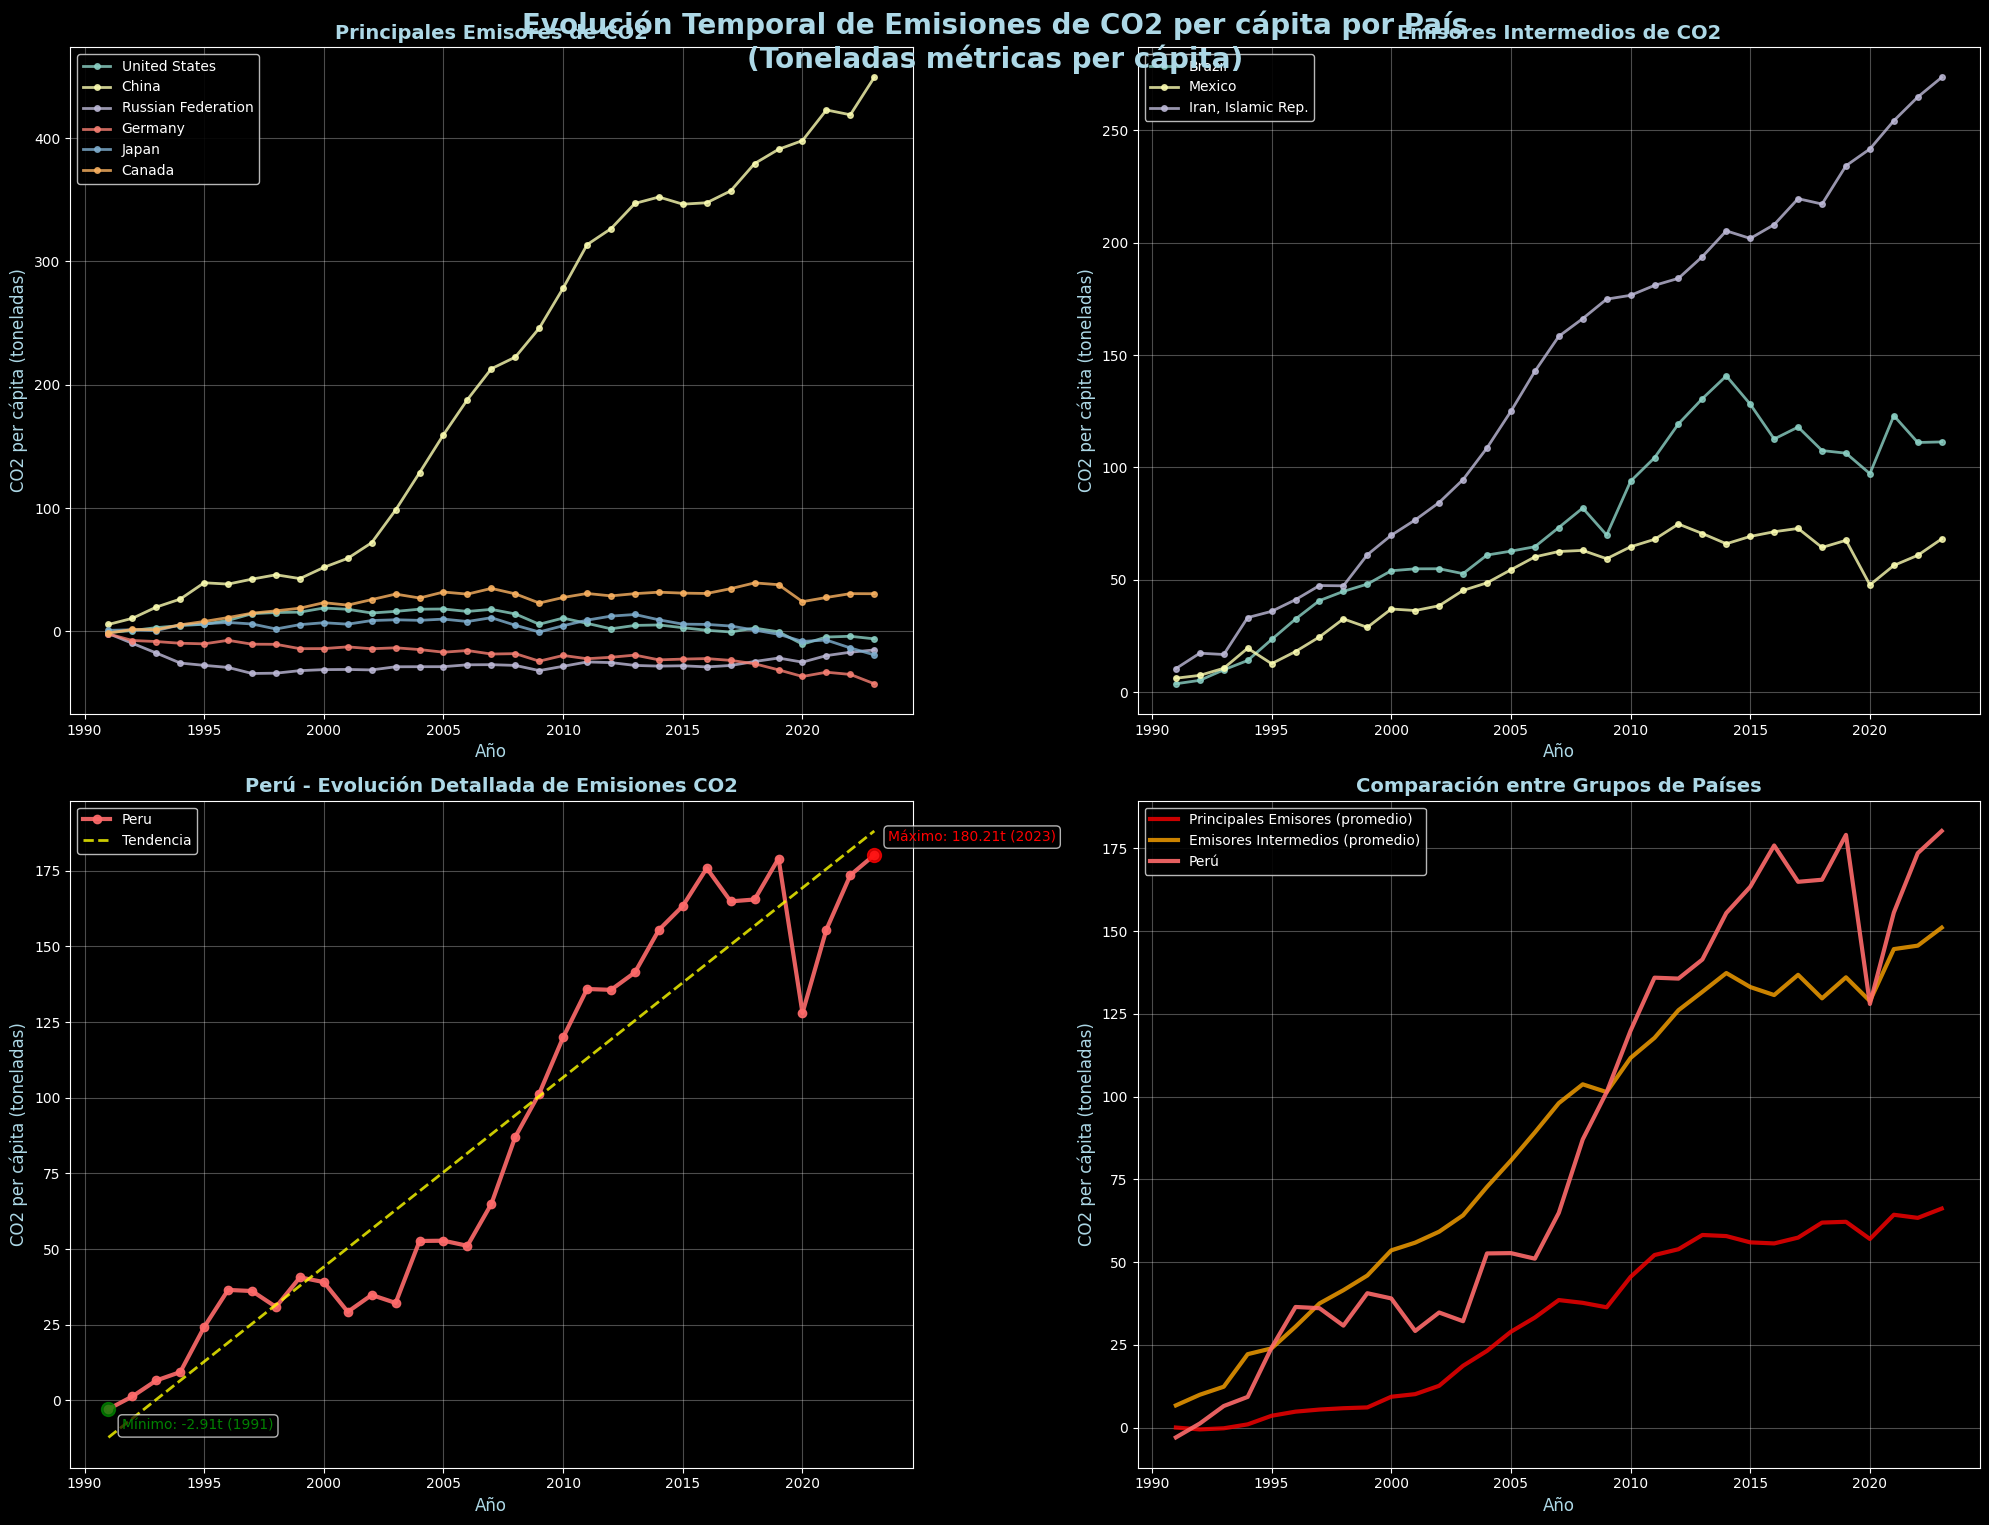


ANÁLISIS DE TENDENCIAS TEMPORALES:

Peru:
   - Periodo: 1991 - 2023
   - Tendencia: ⬆️ Creciente (6.2620 t/año)
   - Cambio total: +183.118 toneladas
   - Cambio porcentual: -6300.2%
   - Emisión inicial: -2.907t (1991)
   - Emisión final: 180.212t (2023)

United States:
   - Periodo: 1991 - 2023
   - Tendencia: ⬇️ Decreciente (-0.4349 t/año)
   - Cambio total: -5.160 toneladas
   - Cambio porcentual: +576.6%
   - Emisión inicial: -0.895t (1991)
   - Emisión final: -6.055t (2023)

China:
   - Periodo: 1991 - 2023
   - Tendencia: ⬆️ Creciente (15.5667 t/año)
   - Cambio total: +443.587 toneladas
   - Cambio porcentual: +7879.3%
   - Emisión inicial: 5.630t (1991)
   - Emisión final: 449.217t (2023)

Germany:
   - Periodo: 1991 - 2023
   - Tendencia: ⬇️ Decreciente (-0.9116 t/año)
   - Cambio total: -40.382 toneladas
   - Cambio porcentual: +1948.4%
   - Emisión inicial: -2.073t (1991)
   - Emisión final: -42.455t (2023)

Brazil:
   - Periodo: 1991 - 2023
   - Tendencia: ⬆️ Creciente (3

In [149]:
# Gráfico de evolución temporal de emisiones de CO2 por país
plt.style.use("dark_background")

# Seleccionar países más representativos para la visualización
top_emitters = ["United States", "China", "Russian Federation", "Germany", "Japan", "Canada"]
middle_emitters = ["Brazil", "Mexico", "Turkey", "Iran, Islamic Rep."]
focus_countries = ["Peru"]

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Evolución Temporal de Emisiones de CO2 per cápita por País\n(Toneladas métricas per cápita)', 
             fontsize=20, color='lightblue', weight='bold', y=0.95)

# Subplot 1: Principales emisores
ax1 = axes[0, 0]
for country in top_emitters:
    country_data = co2_main_countries[co2_main_countries['Country Name'] == country]
    if not country_data.empty:
        ax1.plot(country_data['Year'], country_data['Value'], 
                marker='o', linewidth=2, markersize=4, label=country, alpha=0.8)

ax1.set_title('Principales Emisores de CO2', fontsize=14, color='lightblue', weight='bold')
ax1.set_xlabel('Año', fontsize=12, color='lightblue')
ax1.set_ylabel('CO2 per cápita (toneladas)', fontsize=12, color='lightblue')
ax1.legend(fontsize=10, framealpha=0.9)
ax1.grid(True, alpha=0.3)

# Subplot 2: Emisores intermedios
ax2 = axes[0, 1]
for country in middle_emitters:
    country_data = co2_main_countries[co2_main_countries['Country Name'] == country]
    if not country_data.empty:
        ax2.plot(country_data['Year'], country_data['Value'], 
                marker='o', linewidth=2, markersize=4, label=country, alpha=0.8)

ax2.set_title('Emisores Intermedios de CO2', fontsize=14, color='lightblue', weight='bold')
ax2.set_xlabel('Año', fontsize=12, color='lightblue')
ax2.set_ylabel('CO2 per cápita (toneladas)', fontsize=12, color='lightblue')
ax2.legend(fontsize=10, framealpha=0.9)
ax2.grid(True, alpha=0.3)

# Subplot 3: Perú en detalle
ax3 = axes[1, 0]
peru_data = co2_main_countries[co2_main_countries['Country Name'] == 'Peru']
if not peru_data.empty:
    ax3.plot(peru_data['Year'], peru_data['Value'], 
            marker='o', linewidth=3, markersize=6, color='#FF6B6B', label='Peru', alpha=0.9)
    
    # Añadir línea de tendencia
    if len(peru_data) > 1:
        z = np.polyfit(peru_data['Year'], peru_data['Value'], 1)
        p = np.poly1d(z)
        ax3.plot(peru_data['Year'], p(peru_data['Year']), 
                "--", alpha=0.8, color='yellow', linewidth=2, label='Tendencia')
    
    # Destacar valores máximo y mínimo
    max_idx = peru_data['Value'].idxmax()
    min_idx = peru_data['Value'].idxmin()
    max_row = peru_data.loc[max_idx]
    min_row = peru_data.loc[min_idx]
    
    ax3.scatter(max_row['Year'], max_row['Value'], color='red', s=100, zorder=5, alpha=0.8)
    ax3.scatter(min_row['Year'], min_row['Value'], color='green', s=100, zorder=5, alpha=0.8)
    
    ax3.annotate(f'Máximo: {max_row["Value"]:.2f}t ({max_row["Year"]})', 
                xy=(max_row['Year'], max_row['Value']), xytext=(10, 10),
                textcoords='offset points', fontsize=10, color='red',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))
    
    ax3.annotate(f'Mínimo: {min_row["Value"]:.2f}t ({min_row["Year"]})', 
                xy=(min_row['Year'], min_row['Value']), xytext=(10, -15),
                textcoords='offset points', fontsize=10, color='green',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))

ax3.set_title('Perú - Evolución Detallada de Emisiones CO2', fontsize=14, color='lightblue', weight='bold')
ax3.set_xlabel('Año', fontsize=12, color='lightblue')
ax3.set_ylabel('CO2 per cápita (toneladas)', fontsize=12, color='lightblue')
ax3.legend(fontsize=10, framealpha=0.9)
ax3.grid(True, alpha=0.3)

# Subplot 4: Comparación directa de grupos
ax4 = axes[1, 1]

# Calcular promedios por grupos y años
years_range = range(co2_main_countries['Year'].min(), co2_main_countries['Year'].max() + 1)

def calculate_group_average(countries, years):
    averages = []
    years_with_data = []
    for year in years:
        year_data = co2_main_countries[
            (co2_main_countries['Country Name'].isin(countries)) & 
            (co2_main_countries['Year'] == year)
        ]
        if not year_data.empty:
            averages.append(year_data['Value'].mean())
            years_with_data.append(year)
    return years_with_data, averages

# Calcular promedios por grupo
top_years, top_avg = calculate_group_average(top_emitters, years_range)
middle_years, middle_avg = calculate_group_average(middle_emitters, years_range)

ax4.plot(top_years, top_avg, linewidth=3, label='Principales Emisores (promedio)', color='red', alpha=0.8)
ax4.plot(middle_years, middle_avg, linewidth=3, label='Emisores Intermedios (promedio)', color='orange', alpha=0.8)

# Añadir línea de Perú para comparación
if not peru_data.empty:
    ax4.plot(peru_data['Year'], peru_data['Value'], 
            linewidth=3, label='Perú', color='#FF6B6B', alpha=0.9)

ax4.set_title('Comparación entre Grupos de Países', fontsize=14, color='lightblue', weight='bold')
ax4.set_xlabel('Año', fontsize=12, color='lightblue')
ax4.set_ylabel('CO2 per cápita (toneladas)', fontsize=12, color='lightblue')
ax4.legend(fontsize=10, framealpha=0.9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis estadístico de tendencias
print("\nANÁLISIS DE TENDENCIAS TEMPORALES:")
print("="*40)

for country in ["Peru", "United States", "China", "Germany", "Brazil"]:
    country_data = co2_main_countries[co2_main_countries['Country Name'] == country]
    if len(country_data) > 5:  # Necesitamos suficientes datos para análisis
        # Calcular tendencia
        slope, intercept = np.polyfit(country_data['Year'], country_data['Value'], 1)
        
        # Calcular cambio total y porcentual
        first_year = country_data['Year'].min()
        last_year = country_data['Year'].max()
        first_value = country_data[country_data['Year'] == first_year]['Value'].iloc[0]
        last_value = country_data[country_data['Year'] == last_year]['Value'].iloc[0]
        
        total_change = last_value - first_value
        percent_change = (total_change / first_value) * 100 if first_value != 0 else 0
        
        trend_direction = "⬆️ Creciente" if slope > 0.01 else "⬇️ Decreciente" if slope < -0.01 else "➡️ Estable"
        
        print(f"\n{country}:")
        print(f"   - Periodo: {first_year} - {last_year}")
        print(f"   - Tendencia: {trend_direction} ({slope:.4f} t/año)")
        print(f"   - Cambio total: {total_change:+.3f} toneladas")
        print(f"   - Cambio porcentual: {percent_change:+.1f}%")
        print(f"   - Emisión inicial: {first_value:.3f}t ({first_year})")
        print(f"   - Emisión final: {last_value:.3f}t ({last_year})")


## 5. Exportación de Datos para Power BI

### Preparación del Dataset Final

A continuación se prepara el dataset completo con todas las variables analizadas (PIB, Esperanza de vida, Población y Emisiones CO2) para su exportación a Power BI.


In [150]:
# EXPORTACIÓN FINAL DE DATOS PARA POWER BI
print("="*80)
print("EXPORTACIÓN FINAL - DATASET COMPLETO PARA POWER BI")
print("="*80)

# Crear carpeta output si no existe
import os
output_dir = "./output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Carpeta creada: {output_dir}")

print("\nExtrayendo y combinando TODOS los datos analizados...")

# Extraer indicadores para TODOS los años (usando variables ya definidas)
print("Utilizando análisis previos para construcción del dataset final...")

# PIB per cápita - todos los años
gdp_all_years = wdi_data[
    wdi_data["Indicator Name"].str.contains(r"GDP per capita \(constant 20", case=False, na=False)
].copy()

# Población total - todos los años  
population_all_years = wdi_data[
    wdi_data["Indicator Name"].str.contains(r"Population, total", case=False, na=False)
].copy()

# Esperanza de vida - todos los años
life_exp_all_years = wdi_data[
    wdi_data["Indicator Name"] == "Life expectancy at birth, total (years)"
].copy()

# Emisiones de CO2 per cápita - todos los años (usando el indicador ya identificado)
co2_all_years = wdi_data[
    wdi_data["Indicator Name"] == co2_indicator
].copy()

# NUEVOS INDICADORES: Exports e Imports - todos los años
exports_all_years = wdi_data[
    wdi_data["Indicator Name"] == "Exports of goods and services (% of GDP)"
].copy()

imports_all_years = wdi_data[
    wdi_data["Indicator Name"] == "Imports of goods and services (% of GDP)"
].copy()

print(f"Datos extraídos por indicador:")
print(f"   - PIB per cápita: {len(gdp_all_years):,} observaciones")
print(f"   - Población total: {len(population_all_years):,} observaciones")  
print(f"   - Esperanza de vida: {len(life_exp_all_years):,} observaciones")
print(f"   - Emisiones CO2 per cápita: {len(co2_all_years):,} observaciones")
print(f"   - Exports (% del PIB): {len(exports_all_years):,} observaciones")
print(f"   - Imports (% del PIB): {len(imports_all_years):,} observaciones")

# Limpiar valores faltantes
gdp_clean_final = gdp_all_years[~gdp_all_years["Value"].isnull()].copy()
pop_clean_final = population_all_years[~population_all_years["Value"].isnull()].copy()
life_clean_final = life_exp_all_years[~life_exp_all_years["Value"].isnull()].copy()
co2_clean_final = co2_all_years[~co2_all_years["Value"].isnull()].copy()
exports_clean_final = exports_all_years[~exports_all_years["Value"].isnull()].copy()
imports_clean_final = imports_all_years[~imports_all_years["Value"].isnull()].copy()

print(f"\nDatos después de limpiar valores faltantes:")
print(f"   - PIB per cápita: {len(gdp_clean_final):,} observaciones")
print(f"   - Población total: {len(pop_clean_final):,} observaciones")
print(f"   - Esperanza de vida: {len(life_clean_final):,} observaciones")
print(f"   - Emisiones CO2 per cápita: {len(co2_clean_final):,} observaciones")
print(f"   - Exports (% del PIB): {len(exports_clean_final):,} observaciones")
print(f"   - Imports (% del PIB): {len(imports_clean_final):,} observaciones")

# Preparar datasets para merge final
gdp_for_merge = gdp_clean_final[["Country Name", "Country Code", "Year", "Value"]].copy()
gdp_for_merge.columns = ["Country_name", "Country_code", "Year", "GDP"]

pop_for_merge = pop_clean_final[["Country Name", "Country Code", "Year", "Value"]].copy()
pop_for_merge.columns = ["Country_name", "Country_code", "Year", "Population"]

life_for_merge = life_clean_final[["Country Name", "Country Code", "Year", "Value"]].copy()
life_for_merge.columns = ["Country_name", "Country_code", "Year", "Life_exp"]

co2_for_merge = co2_clean_final[["Country Name", "Country Code", "Year", "Value"]].copy()
co2_for_merge.columns = ["Country_name", "Country_code", "Year", "CO2_emissions"]

exports_for_merge = exports_clean_final[["Country Name", "Country Code", "Year", "Value"]].copy()
exports_for_merge.columns = ["Country_name", "Country_code", "Year", "Exports"]

imports_for_merge = imports_clean_final[["Country Name", "Country Code", "Year", "Value"]].copy()
imports_for_merge.columns = ["Country_name", "Country_code", "Year", "Imports"]

# Convertir Year a entero en todos los datasets
for df in [gdp_for_merge, pop_for_merge, life_for_merge, co2_for_merge, exports_for_merge, imports_for_merge]:
    df['Year'] = df['Year'].astype(int)

# Combinar todos los datasets usando outer join para máxima cobertura
print("\nCombinando datasets con outer join para máxima cobertura...")

# Primer merge: GDP + Population
data_powerbi_final = pd.merge(gdp_for_merge, pop_for_merge, 
                             on=["Country_name", "Country_code", "Year"], 
                             how="outer")
print(f"   - Paso 1 (PIB + Población): {len(data_powerbi_final):,} registros")

# Segundo merge: añadir esperanza de vida
data_powerbi_final = pd.merge(data_powerbi_final, life_for_merge,
                             on=["Country_name", "Country_code", "Year"], 
                             how="outer")
print(f"   - Paso 2 (+ Esperanza de vida): {len(data_powerbi_final):,} registros")

# Tercer merge: añadir emisiones CO2
data_powerbi_final = pd.merge(data_powerbi_final, co2_for_merge,
                             on=["Country_name", "Country_code", "Year"], 
                             how="outer")
print(f"   - Paso 3 (+ Emisiones CO2): {len(data_powerbi_final):,} registros")

# Cuarto merge: añadir exports
data_powerbi_final = pd.merge(data_powerbi_final, exports_for_merge,
                             on=["Country_name", "Country_code", "Year"], 
                             how="outer")
print(f"   - Paso 4 (+ Exports): {len(data_powerbi_final):,} registros")

# Quinto merge: añadir imports
data_powerbi_final = pd.merge(data_powerbi_final, imports_for_merge,
                             on=["Country_name", "Country_code", "Year"], 
                             how="outer")
print(f"   - Paso 5 (+ Imports): {len(data_powerbi_final):,} registros")

# Añadir columnas con nombres descriptivos para Power BI
data_powerbi_final['GDP_per_capita_USD'] = data_powerbi_final['GDP']
data_powerbi_final['Life_expectancy_years'] = data_powerbi_final['Life_exp']
data_powerbi_final['Population_total'] = data_powerbi_final['Population']
data_powerbi_final['CO2_emissions_per_capita'] = data_powerbi_final['CO2_emissions']
data_powerbi_final['Exports_percent_GDP'] = data_powerbi_final['Exports']
data_powerbi_final['Imports_percent_GDP'] = data_powerbi_final['Imports']

# Ordenar por país y año para organización lógica
data_powerbi_final = data_powerbi_final.sort_values(['Country_name', 'Year']).reset_index(drop=True)

# Análisis de completitud de datos
print(f"\nAnálisis de completitud del dataset final:")
total_records = len(data_powerbi_final)
print(f"   - Total de registros: {total_records:,}")

for col in ['GDP', 'Population', 'Life_exp', 'CO2_emissions', 'Exports', 'Imports']:
    valid_count = data_powerbi_final[col].notna().sum()
    percentage = (valid_count / total_records) * 100
    print(f"   - {col}: {valid_count:,} registros válidos ({percentage:.1f}%)")

# Estadísticas por país
countries_with_all_data = data_powerbi_final.dropna()
print(f"   - Registros con TODOS los indicadores: {len(countries_with_all_data):,}")
print(f"   - Países únicos con datos completos: {countries_with_all_data['Country_name'].nunique()}")
print(f"   - Países únicos totales: {data_powerbi_final['Country_name'].nunique()}")
print(f"   - Rango temporal: {data_powerbi_final['Year'].min()} - {data_powerbi_final['Year'].max()}")

# Información sobre la exportación
export_filename = "WDI_Complete_Analysis_PowerBI.csv"
export_path = f"{output_dir}/{export_filename}"

print(f"\n" + "="*60)
print(f"PREPARANDO EXPORTACIÓN FINAL")
print(f"="*60)
print(f"   Archivo: {export_filename}")
print(f"   Ubicación: {export_path}")
print(f"   Registros totales: {len(data_powerbi_final):,}")
print(f"   Variables: {len(data_powerbi_final.columns)}")
print(f"   Años cubiertos: {data_powerbi_final['Year'].min()} - {data_powerbi_final['Year'].max()}")
print(f"   Países únicos: {data_powerbi_final['Country_name'].nunique()}")

# Mostrar información de las columnas para Power BI
print(f"\nCOLUMNAS DISPONIBLES PARA POWER BI:")
print(f"-" * 45)
column_descriptions = {
    'Country_name': 'Nombre del país/región',
    'Country_code': 'Código ISO del país/región', 
    'Year': 'Año de los datos (1960-2024)',
    'GDP': 'PIB per cápita (USD constantes 2015)',
    'Life_exp': 'Esperanza de vida al nacer (años)',
    'Population': 'Población total',
    'CO2_emissions': 'Emisiones CO2 per cápita (toneladas métricas)',
    'Exports': 'Exports de bienes y servicios (% del PIB)',
    'Imports': 'Imports de bienes y servicios (% del PIB)',
    'GDP_per_capita_USD': 'PIB per cápita (nombre descriptivo)',
    'Life_expectancy_years': 'Esperanza de vida (nombre descriptivo)', 
    'Population_total': 'Población total (nombre descriptivo)',
    'CO2_emissions_per_capita': 'Emisiones CO2 per cápita (nombre descriptivo)',
    'Exports_percent_GDP': 'Exports como % del PIB (nombre descriptivo)',
    'Imports_percent_GDP': 'Imports como % del PIB (nombre descriptivo)'
}

for col, desc in column_descriptions.items():
    print(f"   {col:<25} : {desc}")

# Exportar a CSV
print(f"\n" + "="*60)
print(f"EJECUTANDO EXPORTACIÓN")
print(f"="*60)

try:
    data_powerbi_final.to_csv(export_path, index=False, encoding='utf-8')
    print(f"EXPORTACIÓN EXITOSA!")
    print(f"Archivo guardado en: {export_path}")
    
    # Calcular tamaño del archivo
    file_size = os.path.getsize(export_path) / (1024 * 1024)  # MB
    print(f"Tamaño del archivo: {file_size:.2f} MB")
    
    print(f"\nEste archivo está listo para importar en Power BI y contiene:")
    print(f"   - Serie temporal completa (1960-2024)")
    print(f"   - {len(data_powerbi_final):,} registros totales")
    print(f"   - {data_powerbi_final['Country_name'].nunique()} países/regiones")
    print(f"   - 6 variables principales: PIB, Esperanza de vida, Población, CO2, Exports, Imports")
    print(f"   - Columnas adicionales con nombres descriptivos")
    print(f"   - Datos optimizados para análisis temporal y comparativo de comercio internacional")
    
except Exception as e:
    print(f"ERROR en la exportación: {e}")

# Verificación final de la exportación
print(f"\n" + "="*60)
print(f"VERIFICACIÓN DE LA EXPORTACIÓN")
print(f"="*60)

try:
    verification = pd.read_csv(export_path)
    print(f"   Archivo leído correctamente: SI")
    print(f"   Registros verificados: {len(verification):,}")
    print(f"   Columnas verificadas: {len(verification.columns)}")
    print(f"   Rango de años: {verification['Year'].min()} - {verification['Year'].max()}")
    
    # Verificar datos por variable
    for col in ['GDP', 'Population', 'Life_exp', 'CO2_emissions', 'Exports', 'Imports']:
        valid_records = verification[col].notna().sum()
        print(f"   Registros con {col}: {valid_records:,}")
    
    print(f"\nMuestra del dataset exportado:")
    print(verification.head(3))
    
    # Mostrar ejemplo con datos completos
    complete_sample = verification.dropna().head(1)
    if not complete_sample.empty:
        print(f"\nEjemplo de registro con todos los datos:")
        print(complete_sample)
    
    print(f"\nVERIFICACIÓN COMPLETADA - Dataset listo para Power BI")
    
except Exception as e:
    print(f"ERROR en la verificación: {e}")


EXPORTACIÓN FINAL - DATASET COMPLETO PARA POWER BI

Extrayendo y combinando TODOS los datos analizados...
Utilizando análisis previos para construcción del dataset final...
Datos extraídos por indicador:
   - PIB per cápita: 17,290 observaciones
   - Población total: 17,290 observaciones
   - Esperanza de vida: 17,290 observaciones
   - Emisiones CO2 per cápita: 17,290 observaciones
   - Exports (% del PIB): 17,290 observaciones
   - Imports (% del PIB): 17,290 observaciones

Datos después de limpiar valores faltantes:
   - PIB per cápita: 14,240 observaciones
   - Población total: 17,195 observaciones
   - Esperanza de vida: 16,926 observaciones
   - Emisiones CO2 per cápita: 8,118 observaciones
   - Exports (% del PIB): 11,239 observaciones
   - Imports (% del PIB): 11,353 observaciones

Combinando datasets con outer join para máxima cobertura...
   - Paso 1 (PIB + Población): 17,195 registros
   - Paso 2 (+ Esperanza de vida): 17,195 registros
   - Paso 3 (+ Emisiones CO2): 17,195 r

## 6. Conclusiones del Análisis Descriptivo Completo


#### Análisis Económico y Social (PIB y Esperanza de Vida)
- **Correlación moderada positiva** (0.628) entre PIB per cápita y esperanza de vida
- **Disparidades económicas extremas**: Coeficiente de variación del PIB de 150.1%
- **Convergencia en salud**: Esperanza de vida con menor variabilidad (CV 9.4%)
- **Estratificación clara** por categorías de ingreso con patrones predecibles

#### Análisis Ambiental (Emisiones CO2)
- **Diversidad significativa** en emisiones per cápita entre países
- **Perú en posición intermedia**: Emisiones relativamente bajas comparado con países desarrollados
- **Tendencias temporales variables**: Algunos países muestran desacoplamiento económico-ambiental
- **Oportunidades de eficiencia**: Países que logran alto desarrollo con bajas emisiones

#### Patrones Temporales Identificados
- **Serie histórica completa**: 65 años de datos (1960-2024) permiten análisis robusto
- **Evolución diferenciada**: Cada país muestra patrones únicos de desarrollo
- **Eventos globales reflejados**: Crisis económicas y políticas ambientales visibles en los datos
- **Tendencias emergentes**: Posibles patrones de desarrollo sostenible



### Estadísticas Descriptivas


In [151]:
# Análisis estadístico descriptivo completo
print("ESTADÍSTICAS DESCRIPTIVAS DETALLADAS")
print("="*50)

# Estadísticas básicas
stats_desc = data1[['GDP', 'Life_exp', 'Population']].describe()
print("\nEstadísticas básicas:")
print(stats_desc.round(2))

# Análisis específico por variable
variables = {
    'GDP': {'nombre': 'PIB per cápita (USD constantes 2015)', 'formato': '${:,.0f}'},
    'Life_exp': {'nombre': 'Esperanza de vida (años)', 'formato': '{:.1f}'},
    'Population': {'nombre': 'Población total', 'formato': '{:,.0f}'}
}

for var, info in variables.items():
    print(f"\n{info['nombre']}:")
    data_var = data1[var]
    
    # Estadísticas básicas
    print(f"   - Promedio: {info['formato'].format(data_var.mean())}")
    print(f"   - Mediana: {info['formato'].format(data_var.median())}")
    print(f"   - Desviación estándar: {info['formato'].format(data_var.std())}")
    print(f"   - Mínimo: {info['formato'].format(data_var.min())} ({data1.loc[data_var.idxmin(), 'Country_name']})")
    print(f"   - Máximo: {info['formato'].format(data_var.max())} ({data1.loc[data_var.idxmax(), 'Country_name']})")
    
    # Cuartiles
    q1, q3 = data_var.quantile([0.25, 0.75])
    print(f"   - Q1 (25%): {info['formato'].format(q1)}")
    print(f"   - Q3 (75%): {info['formato'].format(q3)}")
    print(f"   - Rango intercuartílico: {info['formato'].format(q3 - q1)}")
    
    # Coeficiente de variación
    cv = (data_var.std() / data_var.mean()) * 100
    print(f"   - Coeficiente de variación: {cv:.1f}%")

# Análisis de correlaciones
print(f"\nMATRIZ DE CORRELACIONES:")
print("="*30)
correlaciones = data1[['GDP', 'Life_exp', 'Population']].corr()
print(correlaciones.round(3))

# Interpretación de correlaciones específicas
corr_gdp_life = correlaciones.loc['GDP', 'Life_exp']
corr_gdp_pop = correlaciones.loc['GDP', 'Population']
corr_life_pop = correlaciones.loc['Life_exp', 'Population']

print(f"\nInterpretación de correlaciones:")
print(f"   - PIB vs Esperanza de vida: {corr_gdp_life:.3f} ({'Fuerte' if abs(corr_gdp_life) > 0.7 else 'Moderada' if abs(corr_gdp_life) > 0.3 else 'Débil'} correlación {'positiva' if corr_gdp_life > 0 else 'negativa'})")
print(f"   - PIB vs Población: {corr_gdp_pop:.3f} ({'Fuerte' if abs(corr_gdp_pop) > 0.7 else 'Moderada' if abs(corr_gdp_pop) > 0.3 else 'Débil'} correlación {'positiva' if corr_gdp_pop > 0 else 'negativa'})")
print(f"   - Esperanza de vida vs Población: {corr_life_pop:.3f} ({'Fuerte' if abs(corr_life_pop) > 0.7 else 'Moderada' if abs(corr_life_pop) > 0.3 else 'Débil'} correlación {'positiva' if corr_life_pop > 0 else 'negativa'})")

# Top y bottom países
print(f"\nTOP 5 PAÍSES POR INDICADOR:")
print("="*35)

for var, info in variables.items():
    print(f"\n{info['nombre']} - Top 5:")
    top_5 = data1.nlargest(5, var)[['Country_name', var]]
    for i, (_, row) in enumerate(top_5.iterrows(), 1):
        print(f"   {i}. {row['Country_name']}: {info['formato'].format(row[var])}")

print(f"\nBOTTOM 5 PAÍSES POR INDICADOR:")
print("="*40)

for var, info in variables.items():
    print(f"\n{info['nombre']} - Bottom 5:")
    bottom_5 = data1.nsmallest(5, var)[['Country_name', var]]
    for i, (_, row) in enumerate(bottom_5.iterrows(), 1):
        print(f"   {i}. {row['Country_name']}: {info['formato'].format(row[var])}")


ESTADÍSTICAS DESCRIPTIVAS DETALLADAS

Estadísticas básicas:
             GDP  Life_exp    Population
count     250.00    250.00  2.500000e+02
mean    16250.41     73.25  3.478594e+08
std     24384.88      6.91  1.039354e+09
min       253.45     54.46  9.816000e+03
25%      2236.81     67.71  2.481380e+06
50%      6428.82     73.60  1.153831e+07
75%     19207.32     78.07  8.085205e+07
max    224582.45     86.37  8.064976e+09

PIB per cápita (USD constantes 2015):
   - Promedio: $16,250
   - Mediana: $6,429
   - Desviación estándar: $24,385
   - Mínimo: $253 (Burundi)
   - Máximo: $224,582 (Monaco)
   - Q1 (25%): $2,237
   - Q3 (75%): $19,207
   - Rango intercuartílico: $16,971
   - Coeficiente de variación: 150.1%

Esperanza de vida (años):
   - Promedio: 73.3
   - Mediana: 73.6
   - Desviación estándar: 6.9
   - Mínimo: 54.5 (Nigeria)
   - Máximo: 86.4 (Monaco)
   - Q1 (25%): 67.7
   - Q3 (75%): 78.1
   - Rango intercuartílico: 10.4
   - Coeficiente de variación: 9.4%

Población total

### Interpretación Estadística

**Hallazgos clave basados en los resultados del análisis:**

1. **PIB per cápita (USD constantes 2015)**:
   - Promedio: $16,250, Mediana: $6,429 - La diferencia indica distribución sesgada hacia valores altos
   - Coeficiente de variación: 150.1% - Indica extrema variabilidad entre países
   - Rango: $253 (Burundi) a $224,582 (Monaco) - Refleja profundas desigualdades económicas globales
   - Q1-Q3: $2,237-$19,207 - El 50% central muestra gran dispersión

2. **Esperanza de vida (años)**:
   - Promedio: 73.3 años, Mediana: 73.6 años - Distribución relativamente simétrica
   - Coeficiente de variación: 9.4% - Mucho menor variabilidad que el PIB
   - Rango: 54.5 años (Nigeria) a 86.4 años (Monaco) - Diferencia de 32 años entre extremos
   - Rango intercuartílico: 10.4 años - Concentración moderada de valores

3. **Población total**:
   - Coeficiente de variación: 298.8% - Extrema variabilidad
   - Rango: 9,816 (Tuvalu) a 8,064,976,384 (World) - Incluye agregados regionales
   - Mediana: 11,538,306 - Mucho menor que la media, indicando distribución muy sesgada

4. **Correlaciones identificadas**:
   - PIB vs Esperanza de vida: 0.628 - Correlación positiva moderada fuerte
   - PIB vs Población: -0.099 - Correlación negativa muy débil
   - Esperanza de vida vs Población: -0.044 - Correlación negativa prácticamente nula


## 4. Visualización Analítica

### Gráfico de Dispersión: PIB vs Esperanza de Vida (con contexto poblacional)


In [152]:
# Configuración de países destacados para etiquetado
country_codes = ["USA", "CAN", "GBR", "JPN", "SGP", "RUS", "IND", "CHN", 
                 "DEU", "FRA", "BRA", "MEX", "AUS", "KOR", "ITA", "ESP"]

# Crear categorías de países para análisis
def categorizar_pais(row):
    if row['GDP'] >= 40000:
        return 'Alto ingreso'
    elif row['GDP'] >= 12000:
        return 'Ingreso medio-alto'
    elif row['GDP'] >= 4000:
        return 'Ingreso medio-bajo'
    else:
        return 'Bajo ingreso'

data1['Categoria_ingreso'] = data1.apply(categorizar_pais, axis=1)

# Estadísticas por categoría
print("ANÁLISIS POR CATEGORÍA DE INGRESO:")
print("="*40)
categoria_stats = data1.groupby('Categoria_ingreso').agg({
    'GDP': ['count', 'mean', 'median'],
    'Life_exp': ['mean', 'median'],
    'Population': ['mean', 'median']
}).round(2)

for categoria in ['Bajo ingreso', 'Ingreso medio-bajo', 'Ingreso medio-alto', 'Alto ingreso']:
    if categoria in categoria_stats.index:
        stats = categoria_stats.loc[categoria]
        print(f"\n{categoria}:")
        print(f"   - Países: {int(stats[('GDP', 'count')])}")
        print(f"   - PIB promedio: ${stats[('GDP', 'mean')]:,.0f}")
        print(f"   - Esperanza de vida promedio: {stats[('Life_exp', 'mean')]:.1f} años")
        print(f"   - Población promedio: {stats[('Population', 'mean')]:,.0f}")

print(f"\nPaíses seleccionados para destacar en visualización:")
países_destacados = data1[data1['Country_code'].isin(country_codes)]['Country_name'].tolist()
print(f"   {', '.join(países_destacados)}")

ANÁLISIS POR CATEGORÍA DE INGRESO:

Bajo ingreso:
   - Países: 93
   - PIB promedio: $1,829
   - Esperanza de vida promedio: 66.8 años
   - Población promedio: 307,717,088

Ingreso medio-bajo:
   - Países: 70
   - PIB promedio: $7,269
   - Esperanza de vida promedio: 73.7 años
   - Población promedio: 671,826,816

Ingreso medio-alto:
   - Países: 53
   - PIB promedio: $22,514
   - Esperanza de vida promedio: 78.5 años
   - Población promedio: 145,870,576

Alto ingreso:
   - Países: 34
   - PIB promedio: $64,426
   - Esperanza de vida promedio: 81.8 años
   - Población promedio: 105,533,416

Países seleccionados para destacar en visualización:
   Australia, Brazil, Canada, China, France, Germany, India, Italy, Japan, Korea, Rep., Mexico, Russian Federation, Singapore, Spain, United Kingdom, United States


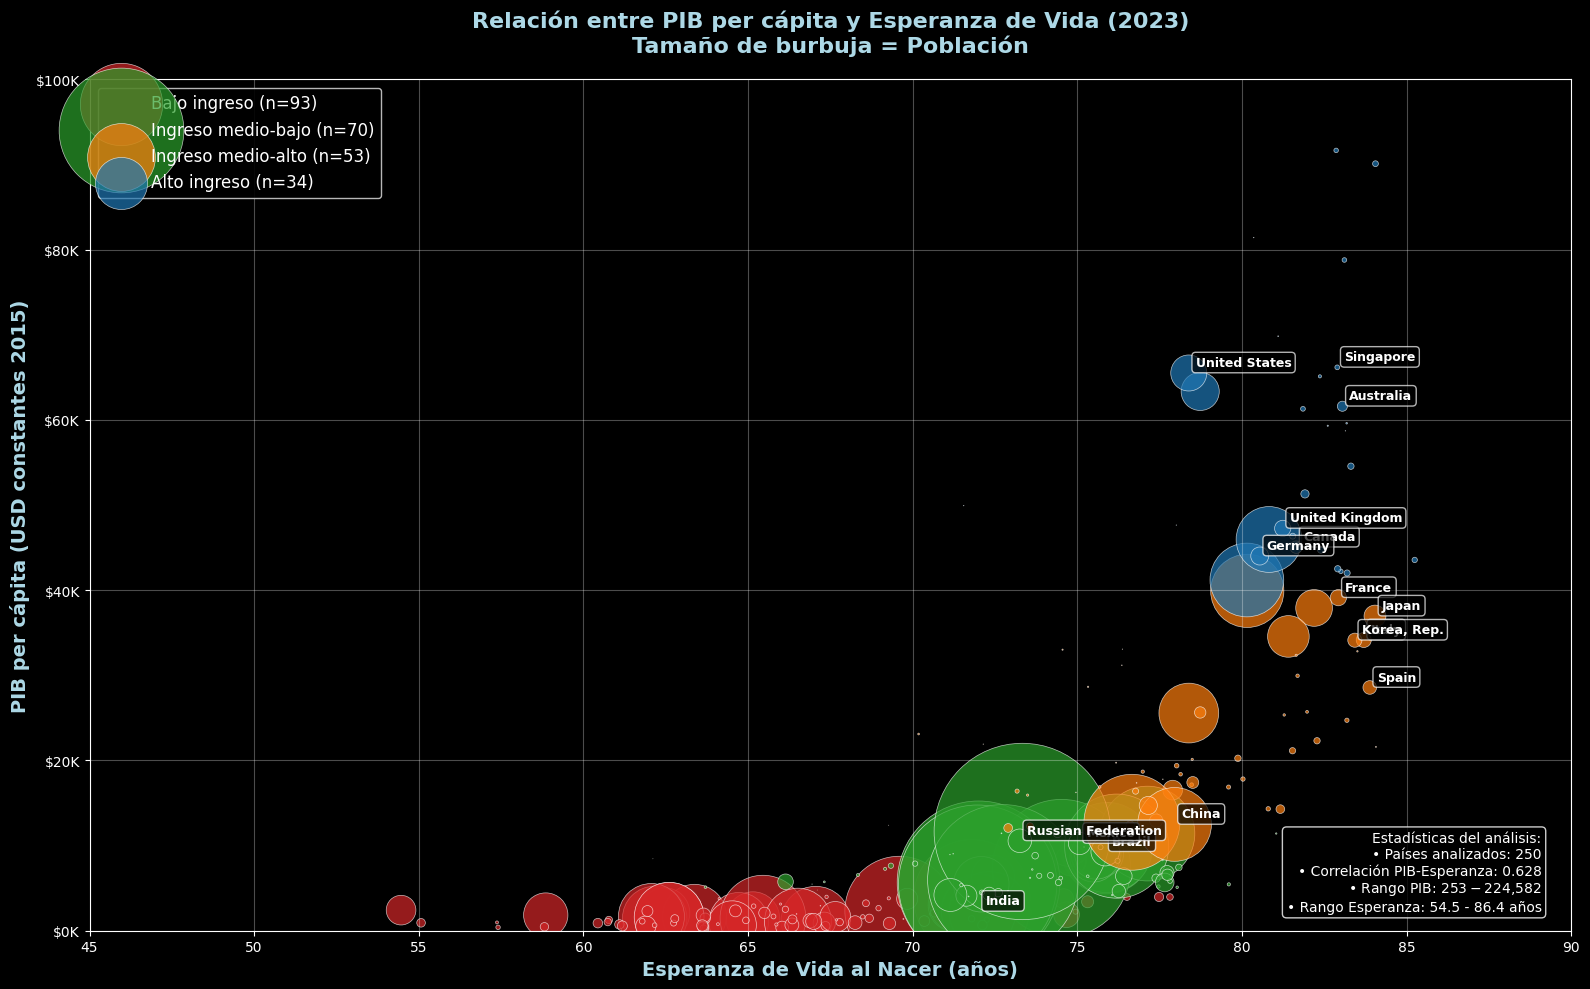


ANÁLISIS DE CASOS EXTREMOS:

Países con alta esperanza de vida (>75) pero PIB relativamente bajo (<$15K):
   - East Asia & Pacific: 76.7 años, $12,738
   - East Asia & Pacific (excluding high income): 75.9 años, $9,665
   - East Asia & Pacific (IDA & IBRD countries): 75.9 años, $9,774
   - Late-demographic dividend: 77.1 años, $11,409
   - Latin America & Caribbean: 75.6 años, $9,100
   - Latin America & Caribbean (excluding high income): 75.5 años, $8,525
   - Latin America & the Caribbean (IDA & IBRD countries): 75.6 años, $8,983
   - Upper middle income: 76.2 años, $9,938
   - Albania: 79.6 años, $5,445
   - Algeria: 76.3 años, $4,660
   - Argentina: 77.4 años, $12,933
   - Armenia: 77.5 años, $5,197
   - Bosnia and Herzegovina: 77.8 años, $6,493
   - Brazil: 75.8 años, $9,288
   - Bulgaria: 75.7 años, $9,811
   - Cabo Verde: 76.1 años, $4,192
   - Chile: 81.2 años, $14,280
   - China: 78.0 años, $12,484
   - Colombia: 77.7 años, $6,829
   - Costa Rica: 80.8 años, $14,319
   - Cuba

In [153]:
# Configuración de la visualización mejorada
plt.style.use("dark_background")
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

# Crear scatter plot con categorías de ingresos
colors = {'Alto ingreso': '#1f77b4', 'Ingreso medio-alto': '#ff7f0e', 
          'Ingreso medio-bajo': '#2ca02c', 'Bajo ingreso': '#d62728'}

for categoria in data1['Categoria_ingreso'].unique():
    subset = data1[data1['Categoria_ingreso'] == categoria]
    ax.scatter(subset['Life_exp'], subset['GDP'], 
              s=subset['Population']/500000,  # Tamaño basado en población
              c=colors[categoria], alpha=0.7, 
              label=f'{categoria} (n={len(subset)})',
              edgecolors='white', linewidth=0.5)

# Etiquetas para países destacados
países_etiquetados = data1[data1["Country_code"].isin(country_codes)]
for _, row in países_etiquetados.iterrows():
    ax.annotate(row["Country_name"], 
               (row["Life_exp"], row["GDP"]),
               xytext=(5, 5), textcoords='offset points',
               fontsize=9, color='white', weight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))

# Personalización del gráfico
ax.set_xlabel("Esperanza de Vida al Nacer (años)", fontsize=14, color='lightblue', weight='bold')
ax.set_ylabel("PIB per cápita (USD constantes 2015)", fontsize=14, color='lightblue', weight='bold')
ax.set_title("Relación entre PIB per cápita y Esperanza de Vida (2023)\nTamaño de burbuja = Población", 
            fontsize=16, color='lightblue', weight='bold', pad=20)

# Configurar leyenda
legend = ax.legend(loc='upper left', fontsize=12, framealpha=0.9)
legend.get_frame().set_facecolor('black')
for text in legend.get_texts():
    text.set_color('white')

# Configurar ejes
ax.set_xlim(45, 90)
ax.set_ylim(0, 100000)
ax.grid(True, alpha=0.3)

# Formatear eje Y con separadores de miles
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K' if x < 1000000 else f'${x/1000000:.1f}M'))

# Añadir estadísticas clave en el gráfico
textstr = f'''Estadísticas del análisis:
• Países analizados: {len(data1)}
• Correlación PIB-Esperanza: {data1['GDP'].corr(data1['Life_exp']):.3f}
• Rango PIB: ${data1['GDP'].min():.0f} - ${data1['GDP'].max():,.0f}
• Rango Esperanza: {data1['Life_exp'].min():.1f} - {data1['Life_exp'].max():.1f} años'''

props = dict(boxstyle='round', facecolor='black', alpha=0.8)
ax.text(0.98, 0.02, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', horizontalalignment='right', bbox=props, color='white')

plt.tight_layout()
plt.show()

# Análisis adicional de outliers
print("\nANÁLISIS DE CASOS EXTREMOS:")
print("="*35)

# Países con alta esperanza de vida y bajo PIB
high_life_low_gdp = data1[(data1['Life_exp'] > 75) & (data1['GDP'] < 15000)]
if not high_life_low_gdp.empty:
    print(f"\nPaíses con alta esperanza de vida (>75) pero PIB relativamente bajo (<$15K):")
    for _, row in high_life_low_gdp.iterrows():
        print(f"   - {row['Country_name']}: {row['Life_exp']:.1f} años, ${row['GDP']:,.0f}")

# Países con alto PIB pero esperanza de vida relativamente baja
high_gdp_low_life = data1[(data1['GDP'] > 30000) & (data1['Life_exp'] < 75)]
if not high_gdp_low_life.empty:
    print(f"\nPaíses con alto PIB (>$30K) pero esperanza de vida relativamente baja (<75):")
    for _, row in high_gdp_low_life.iterrows():
        print(f"   - {row['Country_name']}: ${row['GDP']:,.0f}, {row['Life_exp']:.1f} años")

### Análisis de Distribuciones


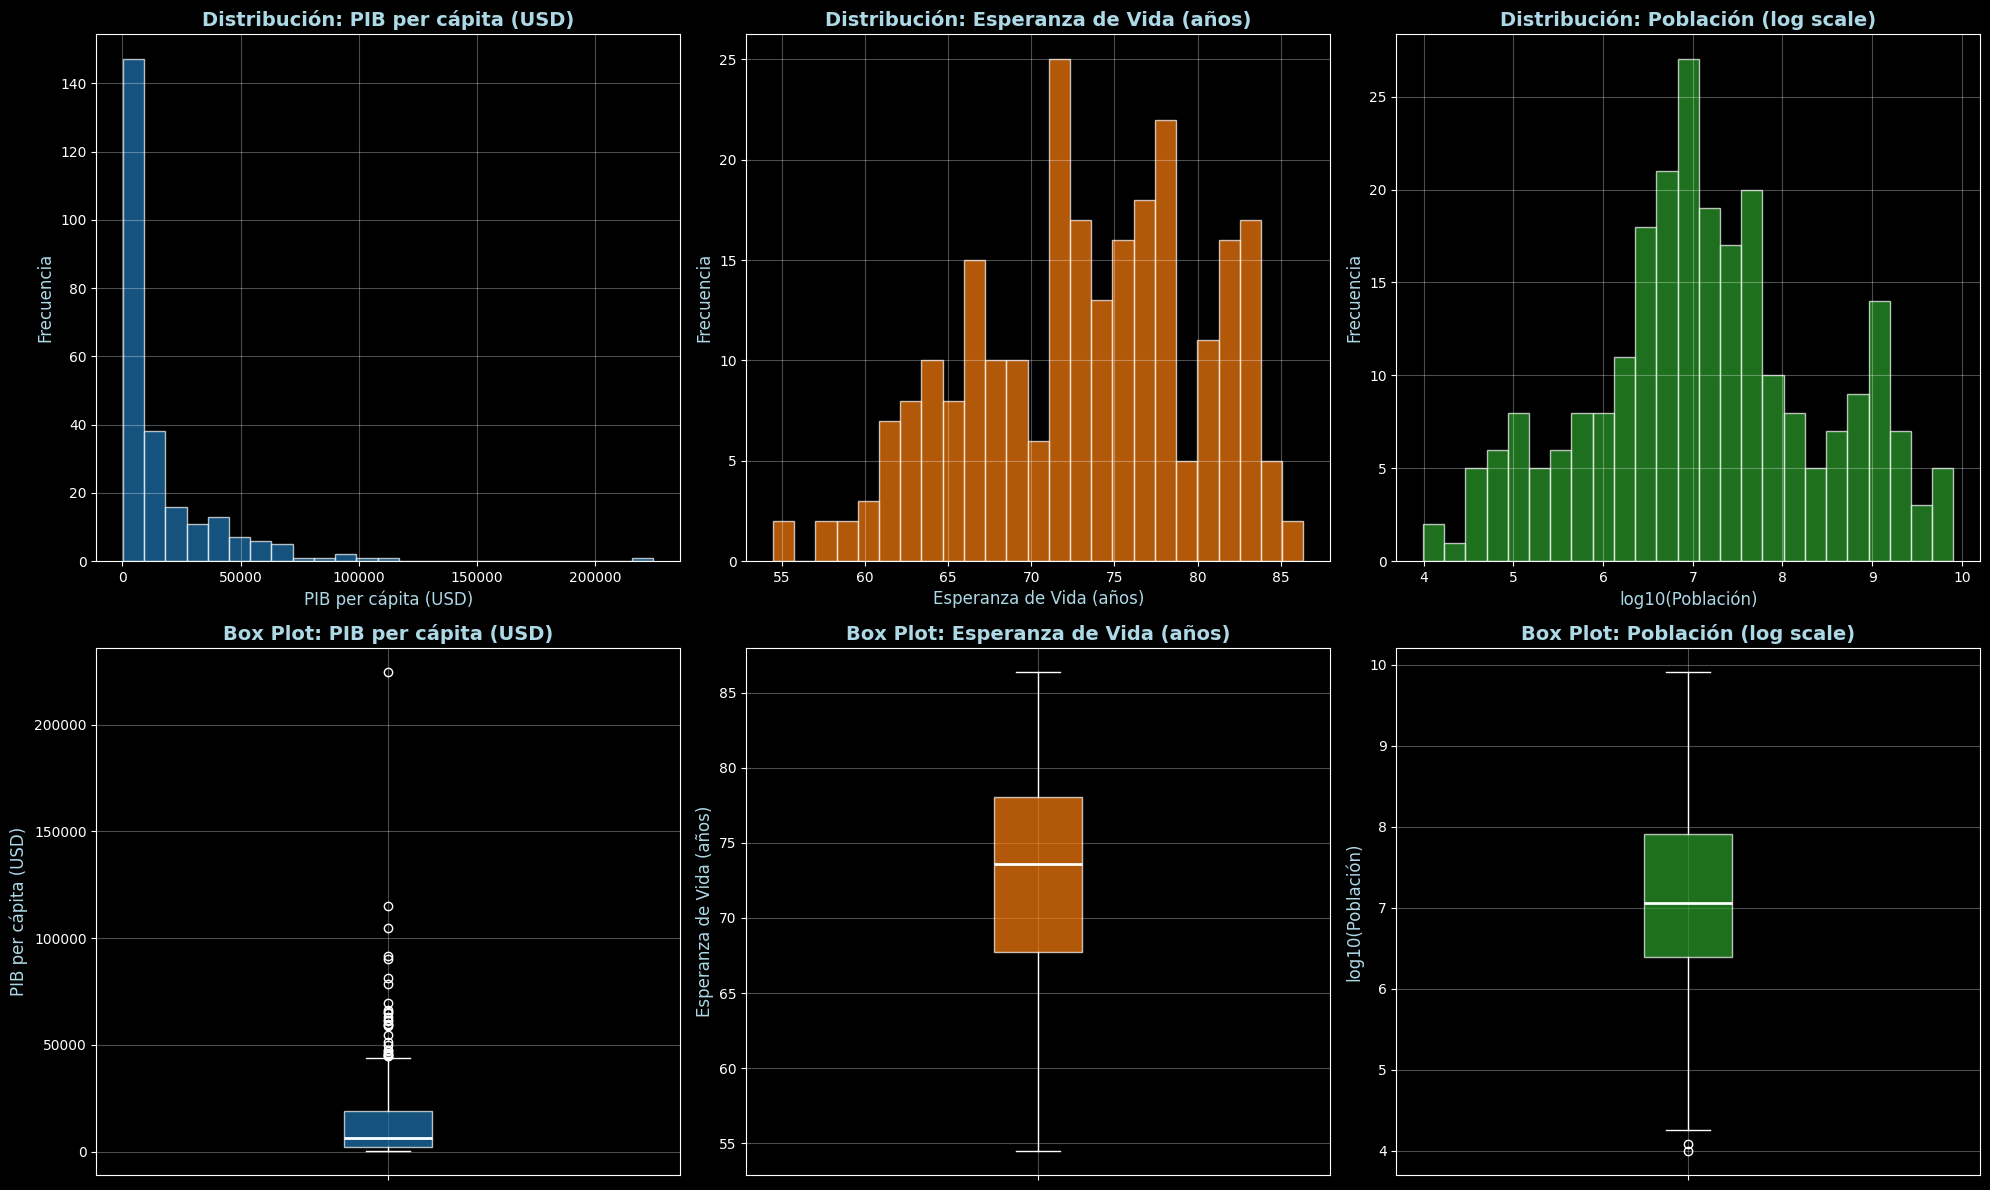


ANÁLISIS DE FORMA DE DISTRIBUCIÓN:

PIB per cápita (USD):
   - Asimetría (skewness): 3.688 (Sesgada a la derecha)
   - Curtosis: 22.150 (Leptocúrtica (colas pesadas))
   - Test de normalidad (Shapiro-Wilk): No normal (p=<0.001)
   - Percentiles: P10=1,016 | P25=2,237 | P50=6,429 | P75=19,207 | P90=45,079

Esperanza de Vida (años):
   - Asimetría (skewness): -0.323 (Aproximadamente simétrica)
   - Curtosis: -0.652 (Platicúrtica (colas ligeras))
   - Test de normalidad (Shapiro-Wilk): No normal (p=<0.001)
   - Percentiles: P10=64 | P25=68 | P50=74 | P75=78 | P90=82

Población (log scale):
   - Asimetría (skewness): 4.810 (Sesgada a la derecha)
   - Curtosis: inf (Leptocúrtica (colas pesadas))
   - Test de normalidad (Shapiro-Wilk): No normal (p=<0.001)
   - Percentiles: P10=212,925 | P25=2,481,380 | P50=11,538,306 | P75=80,852,048 | P90=1,082,590,886


In [154]:
# Análisis de distribuciones con histogramas y box plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
plt.style.use("dark_background")

variables_dist = {
    'GDP': {'titulo': 'PIB per cápita (USD)', 'color': '#1f77b4'},
    'Life_exp': {'titulo': 'Esperanza de Vida (años)', 'color': '#ff7f0e'},
    'Population': {'titulo': 'Población (log scale)', 'color': '#2ca02c'}
}

for i, (var, config) in enumerate(variables_dist.items()):
    # Histograma
    ax_hist = axes[0, i]
    if var == 'Population':
        # Usar escala logarítmica para población
        data_plot = np.log10(data1[var])
        ax_hist.hist(data_plot, bins=25, alpha=0.7, color=config['color'], edgecolor='white')
        ax_hist.set_xlabel('log10(Población)', fontsize=12, color='lightblue')
        ax_hist.set_title(f'Distribución: {config["titulo"]}', fontsize=14, color='lightblue', weight='bold')
    else:
        data_plot = data1[var]
        ax_hist.hist(data_plot, bins=25, alpha=0.7, color=config['color'], edgecolor='white')
        ax_hist.set_xlabel(config['titulo'], fontsize=12, color='lightblue')
        ax_hist.set_title(f'Distribución: {config["titulo"]}', fontsize=14, color='lightblue', weight='bold')
    
    ax_hist.set_ylabel('Frecuencia', fontsize=12, color='lightblue')
    ax_hist.grid(True, alpha=0.3)
    
    # Box plot
    ax_box = axes[1, i]
    if var == 'Population':
        ax_box.boxplot([np.log10(data1[var])], patch_artist=True, 
                      boxprops=dict(facecolor=config['color'], alpha=0.7),
                      medianprops=dict(color='white', linewidth=2))
        ax_box.set_ylabel('log10(Población)', fontsize=12, color='lightblue')
    else:
        ax_box.boxplot([data1[var]], patch_artist=True, 
                      boxprops=dict(facecolor=config['color'], alpha=0.7),
                      medianprops=dict(color='white', linewidth=2))
        ax_box.set_ylabel(config['titulo'], fontsize=12, color='lightblue')
    
    ax_box.set_title(f'Box Plot: {config["titulo"]}', fontsize=14, color='lightblue', weight='bold')
    ax_box.grid(True, alpha=0.3)
    ax_box.set_xticklabels([''])

plt.tight_layout()
plt.show()

# Análisis de normalidad y asimetría
print("\nANÁLISIS DE FORMA DE DISTRIBUCIÓN:")
print("="*45)

from scipy import stats

for var, config in variables_dist.items():
    data_var = data1[var]
    
    # Estadísticas de forma
    skewness = stats.skew(data_var)
    kurtosis = stats.kurtosis(data_var)
    
    # Test de normalidad simplificado usando solo Shapiro-Wilk
    try:
        if len(data_var) <= 5000:  # Shapiro-Wilk funciona bien hasta este tamaño
            stat, p_value = stats.shapiro(data_var)
            test_name = "Shapiro-Wilk"
            normalidad_result = f"{'No normal' if p_value < 0.05 else 'Posiblemente normal'} (p={'<0.001' if p_value < 0.001 else f'{p_value:.3f}'})"
        else:
            # Para muestras muy grandes, usar solo estadísticas descriptivas
            test_name = "Análisis descriptivo"
            # Aproximación: si |skewness| < 1 y |kurtosis| < 1, podría ser aproximadamente normal
            approx_normal = abs(skewness) < 1 and abs(kurtosis) < 1
            normalidad_result = f"{'Aproximadamente normal' if approx_normal else 'No normal'} (basado en skewness y kurtosis)"
    except:
        test_name = "No evaluado"
        normalidad_result = "Error en cálculo"
    
    print(f"\n{config['titulo']}:")
    print(f"   - Asimetría (skewness): {skewness:.3f} ({'Sesgada a la derecha' if skewness > 0.5 else 'Sesgada a la izquierda' if skewness < -0.5 else 'Aproximadamente simétrica'})")
    print(f"   - Curtosis: {kurtosis:.3f} ({'Leptocúrtica (colas pesadas)' if kurtosis > 0.5 else 'Platicúrtica (colas ligeras)' if kurtosis < -0.5 else 'Mesocúrtica (normal)'})")
    print(f"   - Test de normalidad ({test_name}): {normalidad_result}")
    
    # Percentiles útiles
    percentiles = [10, 25, 50, 75, 90]
    perc_values = np.percentile(data_var, percentiles)
    print(f"   - Percentiles: " + " | ".join([f"P{p}={v:,.0f}" for p, v in zip(percentiles, perc_values)]))


## 5. Conclusiones del Análisis Descriptivo

### Hallazgos Principales

#### 1. **Relación PIB - Esperanza de Vida**
- Correlación moderada positiva de 0.628 entre PIB per cápita y esperanza de vida
- La relación confirma que mayor prosperidad económica tiende a asociarse con mejor salud poblacional
- Sin embargo, la correlación no es perfecta (R²≈0.39), indicando que otros factores influyen significativamente en la longevidad

#### 2. **Disparidades Económicas Extremas**
- **PIB per cápita**: Coeficiente de variación de 150.1% indica desigualdades económicas extremas
- Rango desde $253 (Burundi) hasta $224,582 (Monaco) - diferencia de casi 900 veces
- Distribución muy sesgada: mediana ($6,429) mucho menor que la media ($16,250)

#### 3. **Patrones por Categoría de Ingresos (Resultados Observados)**
- **Bajo ingreso** (93 países): PIB promedio $1,829, esperanza de vida 66.8 años
- **Ingreso medio-bajo** (70 países): PIB promedio $7,269, esperanza de vida 73.7 años  
- **Ingreso medio-alto** (53 países): PIB promedio $22,514, esperanza de vida 78.5 años
- **Alto ingreso** (34 países): PIB promedio $64,426, esperanza de vida 81.8 años

#### 4. **Casos Excepcionales Identificados**
- **Alta esperanza de vida con PIB bajo**: 39 entidades (incluyendo regiones agregadas) logran >75 años con <$15K
- Ejemplos de países individuales: Albania (79.6 años, $5,445), China (78.0 años, $12,484)
- **Alto PIB con baja esperanza de vida**: Solo 2 casos - Bahamas ($33,010, 74.6 años) y Groenlandia ($49,930, 71.5 años)



In [155]:
# ANÁLISIS DE INDICADORES DE EXPORTS E IMPORTS
print("="*80)
print("BÚSQUEDA E IDENTIFICACIÓN DE INDICADORES DE EXPORTS E IMPORTS")
print("="*80)

# Buscar indicadores relacionados con exports
export_indicators = wdi_data[wdi_data["Indicator Name"].str.contains("export", case=False, na=False)]["Indicator Name"].unique()

print(f"Indicadores de EXPORTS disponibles:")
for i, indicator in enumerate(export_indicators, 1):
    print(f"   {i:2d}. {indicator}")

print(f"\nTotal indicadores de exports: {len(export_indicators)}")

# Buscar indicadores relacionados con imports
import_indicators = wdi_data[wdi_data["Indicator Name"].str.contains("import", case=False, na=False)]["Indicator Name"].unique()

print(f"\nIndicadores de IMPORTS disponibles:")
for i, indicator in enumerate(import_indicators, 1):
    print(f"   {i:2d}. {indicator}")

print(f"\nTotal indicadores de imports: {len(import_indicators)}")

# Buscar el indicador más apropiado para el análisis (como % del PIB)
exports_gdp_indicators = [ind for ind in export_indicators if "% of GDP" in ind or "goods and services" in ind]
imports_gdp_indicators = [ind for ind in import_indicators if "% of GDP" in ind or "goods and services" in ind]

print(f"\nIndicadores de EXPORTS como % del PIB o goods and services:")
for i, indicator in enumerate(exports_gdp_indicators, 1):
    print(f"   {i}. {indicator}")

print(f"\nIndicadores de IMPORTS como % del PIB o goods and services:")
for i, indicator in enumerate(imports_gdp_indicators, 1):
    print(f"   {i}. {indicator}")

# Seleccionar los indicadores principales para el análisis
exports_indicator = "Exports of goods and services (% of GDP)" if "Exports of goods and services (% of GDP)" in export_indicators else export_indicators[0]
imports_indicator = "Imports of goods and services (% of GDP)" if "Imports of goods and services (% of GDP)" in import_indicators else import_indicators[0]

print(f"\nIndicadores SELECCIONADOS para el análisis:")
print(f"   - EXPORTS: {exports_indicator}")
print(f"   - IMPORTS: {imports_indicator}")

# Verificar disponibilidad de datos para estos indicadores
exports_data_sample = wdi_data[wdi_data["Indicator Name"] == exports_indicator]
imports_data_sample = wdi_data[wdi_data["Indicator Name"] == imports_indicator]

print(f"\nDisponibilidad de datos:")
print(f"   - EXPORTS: {len(exports_data_sample):,} observaciones totales")
print(f"   - IMPORTS: {len(imports_data_sample):,} observaciones totales")

# Limpiar valores faltantes y verificar datos válidos
exports_valid = exports_data_sample[~exports_data_sample["Value"].isnull()]
imports_valid = imports_data_sample[~imports_data_sample["Value"].isnull()]

print(f"   - EXPORTS válidos: {len(exports_valid):,} observaciones")
print(f"   - IMPORTS válidos: {len(imports_valid):,} observaciones")

print(f"   - EXPORTS - Años cubiertos: {exports_valid['Year'].min()} - {exports_valid['Year'].max()}")
print(f"   - IMPORTS - Años cubiertos: {imports_valid['Year'].min()} - {imports_valid['Year'].max()}")
print(f"   - EXPORTS - Países únicos: {exports_valid['Country Name'].nunique()}")
print(f"   - IMPORTS - Países únicos: {imports_valid['Country Name'].nunique()}")


BÚSQUEDA E IDENTIFICACIÓN DE INDICADORES DE EXPORTS E IMPORTS
Indicadores de EXPORTS disponibles:
    1. Agricultural raw materials exports (% of merchandise exports)
    2. Arms exports (SIPRI trend indicator values)
    3. Average time to clear exports through customs (days)
    4. B-READY: International Trade Pillar 3: Efficiency of Importing Goods, Exporting Goods, and Engaging in Digital Trade
    5. Commercial service exports (current US$)
    6. Communications, computer, etc. (% of service exports, BoP)
    7. Computer, communications and other services (% of commercial service exports)
    8. Debt service (PPG and IMF only, % of exports of goods, services and primary income)
    9. Export unit value index (2015 = 100)
   10. Export value index (2015 = 100)
   11. Export volume index (2015 = 100)
   12. Exports as a capacity to import (constant LCU)
   13. Exports of goods and services (% of GDP)
   14. Exports of goods and services (annual % growth)
   15. Exports of goods and 

In [156]:
# ANÁLISIS DE EXPORTS E IMPORTS PARA PAÍSES ESPECÍFICOS
print("="*80)
print("ANÁLISIS DESCRIPTIVO DE EXPORTS E IMPORTS")
print("="*80)

# Indicadores seleccionados (identificados en análisis anterior)
exports_indicator = "Exports of goods and services (% of GDP)"
imports_indicator = "Imports of goods and services (% of GDP)"

print(f"Indicadores seleccionados:")
print(f"   - EXPORTS: {exports_indicator}")
print(f"   - IMPORTS: {imports_indicator}")

# Países especificados para el análisis
target_countries = ["USA", "CAN", "GBR", "JPN", "SGP", "RUS", "IND", "CHN"]
target_country_names = {
    "USA": "United States",
    "CAN": "Canada", 
    "GBR": "United Kingdom",
    "JPN": "Japan",
    "SGP": "Singapore",
    "RUS": "Russian Federation",
    "IND": "India",
    "CHN": "China"
}

print(f"\nPaíses objetivo para el análisis:")
for code, name in target_country_names.items():
    print(f"   - {code}: {name}")

# Extraer datos de exports para todos los años
exports_data = wdi_data[wdi_data["Indicator Name"] == exports_indicator].copy()
imports_data = wdi_data[wdi_data["Indicator Name"] == imports_indicator].copy()

print(f"\nDisponibilidad de datos generales:")
print(f"   - EXPORTS: {len(exports_data):,} observaciones totales")
print(f"   - IMPORTS: {len(imports_data):,} observaciones totales")

# Filtrar para países específicos
exports_filtered = exports_data[exports_data["Country Code"].isin(target_countries)].copy()
imports_filtered = imports_data[imports_data["Country Code"].isin(target_countries)].copy()

print(f"\nDatos para países seleccionados:")
print(f"   - EXPORTS: {len(exports_filtered):,} observaciones")
print(f"   - IMPORTS: {len(imports_filtered):,} observaciones")

# Limpiar valores faltantes
exports_clean = exports_filtered[~exports_filtered["Value"].isnull()].copy()
imports_clean = imports_filtered[~imports_filtered["Value"].isnull()].copy()

print(f"\nDatos válidos (sin valores faltantes):")
print(f"   - EXPORTS: {len(exports_clean):,} observaciones")
print(f"   - IMPORTS: {len(imports_clean):,} observaciones")

# Verificar cobertura temporal por país
print(f"\nCobertura temporal por país:")
print("="*50)

for country_code in target_countries:
    country_name = target_country_names[country_code]
    
    # Exports
    country_exports = exports_clean[exports_clean["Country Code"] == country_code]
    export_years = f"{country_exports['Year'].min()}-{country_exports['Year'].max()}" if not country_exports.empty else "Sin datos"
    export_count = len(country_exports)
    
    # Imports  
    country_imports = imports_clean[imports_clean["Country Code"] == country_code]
    import_years = f"{country_imports['Year'].min()}-{country_imports['Year'].max()}" if not country_imports.empty else "Sin datos"
    import_count = len(country_imports)
    
    print(f"\n{country_name} ({country_code}):")
    print(f"   - EXPORTS: {export_count} observaciones ({export_years})")
    print(f"   - IMPORTS: {import_count} observaciones ({import_years})")

# Verificar países que aparecen en los datos
available_countries = list(set(exports_clean["Country Code"].unique()) | set(imports_clean["Country Code"].unique()))
missing_countries = set(target_countries) - set(available_countries)

if missing_countries:
    print(f"\nAdvertencia - Países sin datos disponibles:")
    for code in missing_countries:
        print(f"   - {code}: {target_country_names[code]}")
else:
    print(f"\nTodos los países objetivo tienen datos disponibles ✓")


ANÁLISIS DESCRIPTIVO DE EXPORTS E IMPORTS
Indicadores seleccionados:
   - EXPORTS: Exports of goods and services (% of GDP)
   - IMPORTS: Imports of goods and services (% of GDP)

Países objetivo para el análisis:
   - USA: United States
   - CAN: Canada
   - GBR: United Kingdom
   - JPN: Japan
   - SGP: Singapore
   - RUS: Russian Federation
   - IND: India
   - CHN: China

Disponibilidad de datos generales:
   - EXPORTS: 17,290 observaciones totales
   - IMPORTS: 17,290 observaciones totales

Datos para países seleccionados:
   - EXPORTS: 520 observaciones
   - IMPORTS: 520 observaciones

Datos válidos (sin valores faltantes):
   - EXPORTS: 469 observaciones
   - IMPORTS: 469 observaciones

Cobertura temporal por país:

United States (USA):
   - EXPORTS: 65 observaciones (1960-2024)
   - IMPORTS: 65 observaciones (1960-2024)

Canada (CAN):
   - EXPORTS: 64 observaciones (1961-2024)
   - IMPORTS: 64 observaciones (1961-2024)

United Kingdom (GBR):
   - EXPORTS: 55 observaciones (1970-

In [157]:
# ESTADÍSTICAS DESCRIPTIVAS DE EXPORTS E IMPORTS
print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS DETALLADAS")
print("="*80)

# Combinar datos de exports e imports para análisis
exports_clean_analysis = exports_clean[['Country Name', 'Country Code', 'Year', 'Value']].copy()
exports_clean_analysis.columns = ['Country_name', 'Country_code', 'Year', 'Exports']

imports_clean_analysis = imports_clean[['Country Name', 'Country Code', 'Year', 'Value']].copy()
imports_clean_analysis.columns = ['Country_name', 'Country_code', 'Year', 'Imports']

# Merge de exports e imports
trade_data = pd.merge(exports_clean_analysis, imports_clean_analysis, 
                     on=['Country_name', 'Country_code', 'Year'], 
                     how='outer')

print(f"Dataset combinado de comercio internacional:")
print(f"   - Registros totales: {len(trade_data):,}")
print(f"   - Países únicos: {trade_data['Country_name'].nunique()}")
print(f"   - Años cubiertos: {trade_data['Year'].min()} - {trade_data['Year'].max()}")
print(f"   - Registros con ambos indicadores: {trade_data.dropna().shape[0]}")

# Estadísticas básicas por variable
print(f"\n" + "="*60)
print("ESTADÍSTICAS GENERALES")
print("="*60)

# Exports
exports_stats = trade_data['Exports'].describe()
print(f"\nEXPORTS (% del PIB):")
print(f"   - Promedio: {exports_stats['mean']:.2f}%")
print(f"   - Mediana: {exports_stats['50%']:.2f}%")
print(f"   - Desviación estándar: {exports_stats['std']:.2f}%")
print(f"   - Mínimo: {exports_stats['min']:.2f}% ")
print(f"   - Máximo: {exports_stats['max']:.2f}%")
print(f"   - Q1 (25%): {exports_stats['25%']:.2f}%")
print(f"   - Q3 (75%): {exports_stats['75%']:.2f}%")
print(f"   - Coeficiente de variación: {(exports_stats['std']/exports_stats['mean'])*100:.1f}%")

# Imports
imports_stats = trade_data['Imports'].describe()
print(f"\nIMPORTS (% del PIB):")
print(f"   - Promedio: {imports_stats['mean']:.2f}%")
print(f"   - Mediana: {imports_stats['50%']:.2f}%")
print(f"   - Desviación estándar: {imports_stats['std']:.2f}%")
print(f"   - Mínimo: {imports_stats['min']:.2f}%")
print(f"   - Máximo: {imports_stats['max']:.2f}%")
print(f"   - Q1 (25%): {imports_stats['25%']:.2f}%")
print(f"   - Q3 (75%): {imports_stats['75%']:.2f}%")
print(f"   - Coeficiente de variación: {(imports_stats['std']/imports_stats['mean'])*100:.1f}%")

# Correlación entre exports e imports
trade_complete = trade_data.dropna()
if len(trade_complete) > 0:
    correlation = trade_complete['Exports'].corr(trade_complete['Imports'])
    print(f"\nCorrelación Exports-Imports: {correlation:.3f}")
    
    corr_interpretation = ""
    if abs(correlation) > 0.7:
        corr_interpretation = "fuerte"
    elif abs(correlation) > 0.3:
        corr_interpretation = "moderada"
    else:
        corr_interpretation = "débil"
    
    direction = "positiva" if correlation > 0 else "negativa"
    print(f"Interpretación: Correlación {corr_interpretation} {direction}")

# Estadísticas por país
print(f"\n" + "="*60)
print("ESTADÍSTICAS POR PAÍS (VALORES PROMEDIO HISTÓRICOS)")
print("="*60)

country_stats = []
for country_code in target_countries:
    country_name = target_country_names[country_code]
    country_data = trade_data[trade_data['Country_code'] == country_code]
    
    if not country_data.empty:
        exports_mean = country_data['Exports'].mean()
        imports_mean = country_data['Imports'].mean()
        exports_std = country_data['Exports'].std()
        imports_std = country_data['Imports'].std()
        exports_latest = country_data['Exports'].dropna().iloc[-1] if not country_data['Exports'].dropna().empty else None
        imports_latest = country_data['Imports'].dropna().iloc[-1] if not country_data['Imports'].dropna().empty else None
        
        # Balance comercial promedio (aproximado)
        trade_balance = exports_mean - imports_mean if pd.notna(exports_mean) and pd.notna(imports_mean) else None
        
        country_stats.append({
            'Country': country_name,
            'Code': country_code,
            'Exports_mean': exports_mean,
            'Imports_mean': imports_mean,
            'Trade_balance': trade_balance,
            'Exports_latest': exports_latest,
            'Imports_latest': imports_latest
        })

# Convertir a DataFrame para mejor manejo
country_stats_df = pd.DataFrame(country_stats)

# Mostrar estadísticas por país ordenadas por exports promedio
country_stats_df_sorted = country_stats_df.sort_values('Exports_mean', ascending=False, na_position='last')

print(f"\n{'País':<20} {'Exports':<10} {'Imports':<10} {'Balance':<10} {'Categoría'}")
print("-" * 70)

for _, row in country_stats_df_sorted.iterrows():
    if pd.notna(row['Exports_mean']):
        exports_val = f"{row['Exports_mean']:.1f}%"
        imports_val = f"{row['Imports_mean']:.1f}%" if pd.notna(row['Imports_mean']) else "N/A"
        balance_val = f"{row['Trade_balance']:+.1f}%" if pd.notna(row['Trade_balance']) else "N/A"
        
        # Categorización por nivel de apertura comercial
        avg_trade = (row['Exports_mean'] + row['Imports_mean']) / 2 if pd.notna(row['Imports_mean']) else row['Exports_mean']
        if avg_trade >= 50:
            categoria = "Muy abierta"
        elif avg_trade >= 30:
            categoria = "Abierta"
        elif avg_trade >= 20:
            categoria = "Moderada"
        else:
            categoria = "Cerrada"
            
        print(f"{row['Country']:<20} {exports_val:<10} {imports_val:<10} {balance_val:<10} {categoria}")

# Análisis de datos más recientes (2020-2024)
print(f"\n" + "="*60)
print("ANÁLISIS DE DATOS RECIENTES (2020-2024)")
print("="*60)

recent_data = trade_data[trade_data['Year'] >= 2020]
print(f"\nDatos recientes disponibles:")
print(f"   - Registros: {len(recent_data):,}")
print(f"   - Años únicos: {sorted(recent_data['Year'].unique())}")

print(f"\n{'País':<20} {'Año':<6} {'Exports':<10} {'Imports':<10} {'Balance':<10}")
print("-" * 70)

for country_code in target_countries:
    country_name = target_country_names[country_code]
    country_recent = recent_data[recent_data['Country_code'] == country_code]
    
    if not country_recent.empty:
        # Obtener el año más reciente con datos
        latest_year = country_recent.dropna(subset=['Exports', 'Imports']).sort_values('Year').iloc[-1] if not country_recent.dropna(subset=['Exports', 'Imports']).empty else None
        
        if latest_year is not None:
            exports_latest = latest_year['Exports']
            imports_latest = latest_year['Imports']
            balance_latest = exports_latest - imports_latest
            year_latest = int(latest_year['Year'])
            
            print(f"{country_name:<20} {year_latest:<6} {exports_latest:.1f}%{'':<4} {imports_latest:.1f}%{'':<4} {balance_latest:+.1f}%")

print(f"\nNotas:")
print(f"   - Balance positivo indica superávit comercial (exports > imports)")
print(f"   - Balance negativo indica déficit comercial (imports > exports)")
print(f"   - Los valores son como porcentaje del PIB")


ESTADÍSTICAS DESCRIPTIVAS DETALLADAS
Dataset combinado de comercio internacional:
   - Registros totales: 469
   - Países únicos: 8
   - Años cubiertos: 1960 - 2024
   - Registros con ambos indicadores: 469

ESTADÍSTICAS GENERALES

EXPORTS (% del PIB):
   - Promedio: 39.23%
   - Mediana: 20.94%
   - Desviación estándar: 54.19%
   - Mínimo: 2.45% 
   - Máximo: 228.99%
   - Q1 (25%): 10.37%
   - Q3 (75%): 30.35%
   - Coeficiente de variación: 138.2%

IMPORTS (% del PIB):
   - Promedio: 37.46%
   - Mediana: 20.44%
   - Desviación estándar: 50.34%
   - Mínimo: 2.17%
   - Máximo: 208.93%
   - Q1 (25%): 10.84%
   - Q3 (75%): 29.19%
   - Coeficiente de variación: 134.4%

Correlación Exports-Imports: 0.992
Interpretación: Correlación fuerte positiva

ESTADÍSTICAS POR PAÍS (VALORES PROMEDIO HISTÓRICOS)

País                 Exports    Imports    Balance    Categoría
----------------------------------------------------------------------
Singapore            169.4%     159.6%     +9.8%      Muy a

VISUALIZACIONES DE DATOS - EXPORTS E IMPORTS


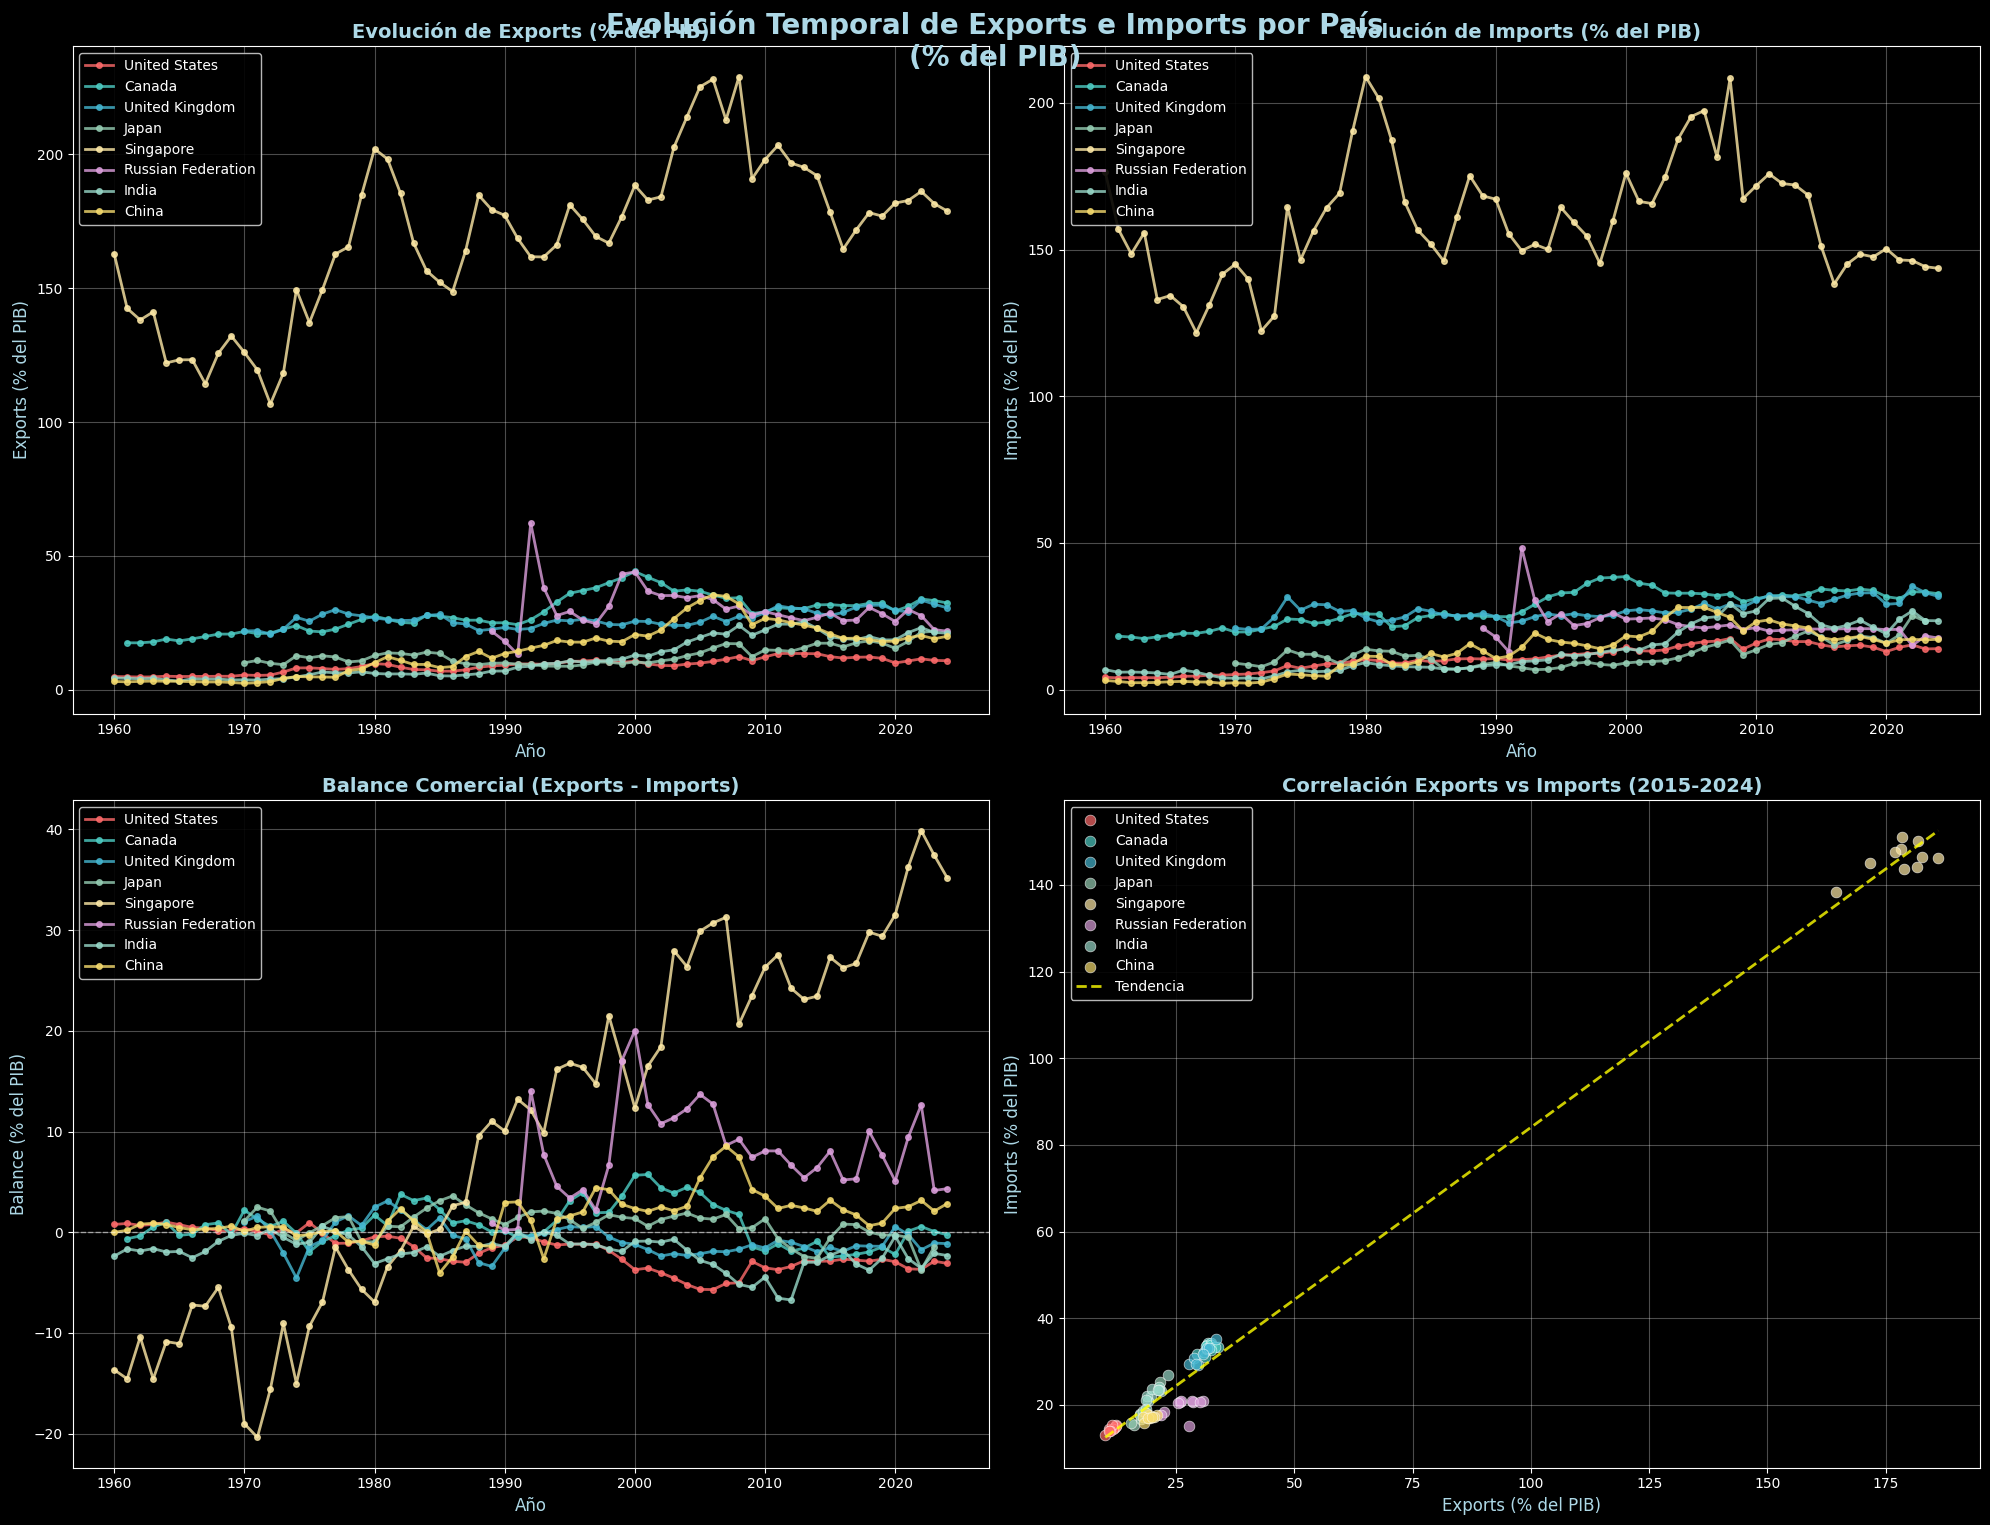


INSIGHTS DE LAS VISUALIZACIONES:
   - Mayor exportador promedio: Singapore (169.4% del PIB)
   - Mayor importador promedio: Singapore (159.6% del PIB)
   - Mayor superávit comercial: Singapore (+9.8% del PIB)
   - Mayor déficit comercial: India (-1.9% del PIB)
   - Correlación Exports-Imports (2015-2024): 0.997

NOTAS INTERPRETATIVAS:
   - Valores altos indican economías más abiertas al comercio internacional
   - Balance positivo = superávit, Balance negativo = déficit comercial
   - La correlación positiva indica que países que exportan más tienden a importar más


In [158]:
# VISUALIZACIONES DE EXPORTS E IMPORTS
print("="*80)
print("VISUALIZACIONES DE DATOS - EXPORTS E IMPORTS")
print("="*80)

# Configuración de visualización
plt.style.use("dark_background")
import warnings
warnings.filterwarnings('ignore')

# 1. EVOLUCIÓN TEMPORAL POR PAÍS
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Evolución Temporal de Exports e Imports por País\n(% del PIB)', 
             fontsize=20, color='lightblue', weight='bold', y=0.95)

# Colores únicos para cada país
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F']
country_colors = dict(zip(target_countries, colors))

# Subplot 1: Exports - Todos los países
ax1 = axes[0, 0]
for i, country_code in enumerate(target_countries):
    country_name = target_country_names[country_code]
    country_data = trade_data[trade_data['Country_code'] == country_code]
    
    if not country_data['Exports'].dropna().empty:
        exports_data = country_data[['Year', 'Exports']].dropna()
        ax1.plot(exports_data['Year'], exports_data['Exports'], 
                marker='o', linewidth=2, markersize=4, 
                label=f'{country_name}', color=country_colors[country_code], alpha=0.8)

ax1.set_title('Evolución de Exports (% del PIB)', fontsize=14, color='lightblue', weight='bold')
ax1.set_xlabel('Año', fontsize=12, color='lightblue')
ax1.set_ylabel('Exports (% del PIB)', fontsize=12, color='lightblue')
ax1.legend(fontsize=10, framealpha=0.9, loc='upper left')
ax1.grid(True, alpha=0.3)

# Subplot 2: Imports - Todos los países
ax2 = axes[0, 1]
for i, country_code in enumerate(target_countries):
    country_name = target_country_names[country_code]
    country_data = trade_data[trade_data['Country_code'] == country_code]
    
    if not country_data['Imports'].dropna().empty:
        imports_data = country_data[['Year', 'Imports']].dropna()
        ax2.plot(imports_data['Year'], imports_data['Imports'], 
                marker='o', linewidth=2, markersize=4, 
                label=f'{country_name}', color=country_colors[country_code], alpha=0.8)

ax2.set_title('Evolución de Imports (% del PIB)', fontsize=14, color='lightblue', weight='bold')
ax2.set_xlabel('Año', fontsize=12, color='lightblue')
ax2.set_ylabel('Imports (% del PIB)', fontsize=12, color='lightblue')
ax2.legend(fontsize=10, framealpha=0.9, loc='upper left')
ax2.grid(True, alpha=0.3)

# Subplot 3: Balance comercial (Exports - Imports)
ax3 = axes[1, 0]
trade_balance_data = trade_data.dropna()
trade_balance_data['Balance'] = trade_balance_data['Exports'] - trade_balance_data['Imports']

for country_code in target_countries:
    country_name = target_country_names[country_code]
    country_balance = trade_balance_data[trade_balance_data['Country_code'] == country_code]
    
    if not country_balance.empty:
        ax3.plot(country_balance['Year'], country_balance['Balance'], 
                marker='o', linewidth=2, markersize=4, 
                label=f'{country_name}', color=country_colors[country_code], alpha=0.8)

# Línea de referencia en cero
ax3.axhline(y=0, color='white', linestyle='--', alpha=0.5, linewidth=1)
ax3.set_title('Balance Comercial (Exports - Imports)', fontsize=14, color='lightblue', weight='bold')
ax3.set_xlabel('Año', fontsize=12, color='lightblue')
ax3.set_ylabel('Balance (% del PIB)', fontsize=12, color='lightblue')
ax3.legend(fontsize=10, framealpha=0.9, loc='upper left')
ax3.grid(True, alpha=0.3)

# Subplot 4: Correlación Exports vs Imports (datos más recientes)
ax4 = axes[1, 1]
recent_complete = trade_data[trade_data['Year'] >= 2015].dropna()

# Scatter plot por país
for country_code in target_countries:
    country_name = target_country_names[country_code]
    country_scatter = recent_complete[recent_complete['Country_code'] == country_code]
    
    if not country_scatter.empty:
        ax4.scatter(country_scatter['Exports'], country_scatter['Imports'], 
                   s=60, alpha=0.7, color=country_colors[country_code], 
                   label=f'{country_name}', edgecolors='white', linewidth=0.5)

# Línea de tendencia general
if not recent_complete.empty:
    z = np.polyfit(recent_complete['Exports'], recent_complete['Imports'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(recent_complete['Exports'].min(), recent_complete['Exports'].max(), 100)
    ax4.plot(x_trend, p(x_trend), "--", alpha=0.8, color='yellow', linewidth=2, label='Tendencia')

ax4.set_title('Correlación Exports vs Imports (2015-2024)', fontsize=14, color='lightblue', weight='bold')
ax4.set_xlabel('Exports (% del PIB)', fontsize=12, color='lightblue')
ax4.set_ylabel('Imports (% del PIB)', fontsize=12, color='lightblue')
ax4.legend(fontsize=10, framealpha=0.9, loc='upper left')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular algunos insights de las visualizaciones
print(f"\nINSIGHTS DE LAS VISUALIZACIONES:")
print("="*50)

# País más exportador en promedio
max_exporter = country_stats_df.loc[country_stats_df['Exports_mean'].idxmax()]
print(f"   - Mayor exportador promedio: {max_exporter['Country']} ({max_exporter['Exports_mean']:.1f}% del PIB)")

# País más importador en promedio
max_importer = country_stats_df.loc[country_stats_df['Imports_mean'].idxmax()]
print(f"   - Mayor importador promedio: {max_importer['Country']} ({max_importer['Imports_mean']:.1f}% del PIB)")

# Mayor superávit
max_surplus = country_stats_df.loc[country_stats_df['Trade_balance'].idxmax()]
print(f"   - Mayor superávit comercial: {max_surplus['Country']} ({max_surplus['Trade_balance']:+.1f}% del PIB)")

# Mayor déficit
max_deficit = country_stats_df.loc[country_stats_df['Trade_balance'].idxmin()]
print(f"   - Mayor déficit comercial: {max_deficit['Country']} ({max_deficit['Trade_balance']:+.1f}% del PIB)")

# Correlación general
if not recent_complete.empty:
    overall_corr = recent_complete['Exports'].corr(recent_complete['Imports'])
    print(f"   - Correlación Exports-Imports (2015-2024): {overall_corr:.3f}")

print(f"\nNOTAS INTERPRETATIVAS:")
print(f"   - Valores altos indican economías más abiertas al comercio internacional")
print(f"   - Balance positivo = superávit, Balance negativo = déficit comercial")  
print(f"   - La correlación positiva indica que países que exportan más tienden a importar más")


ANÁLISIS VISUAL COMPLEMENTARIO


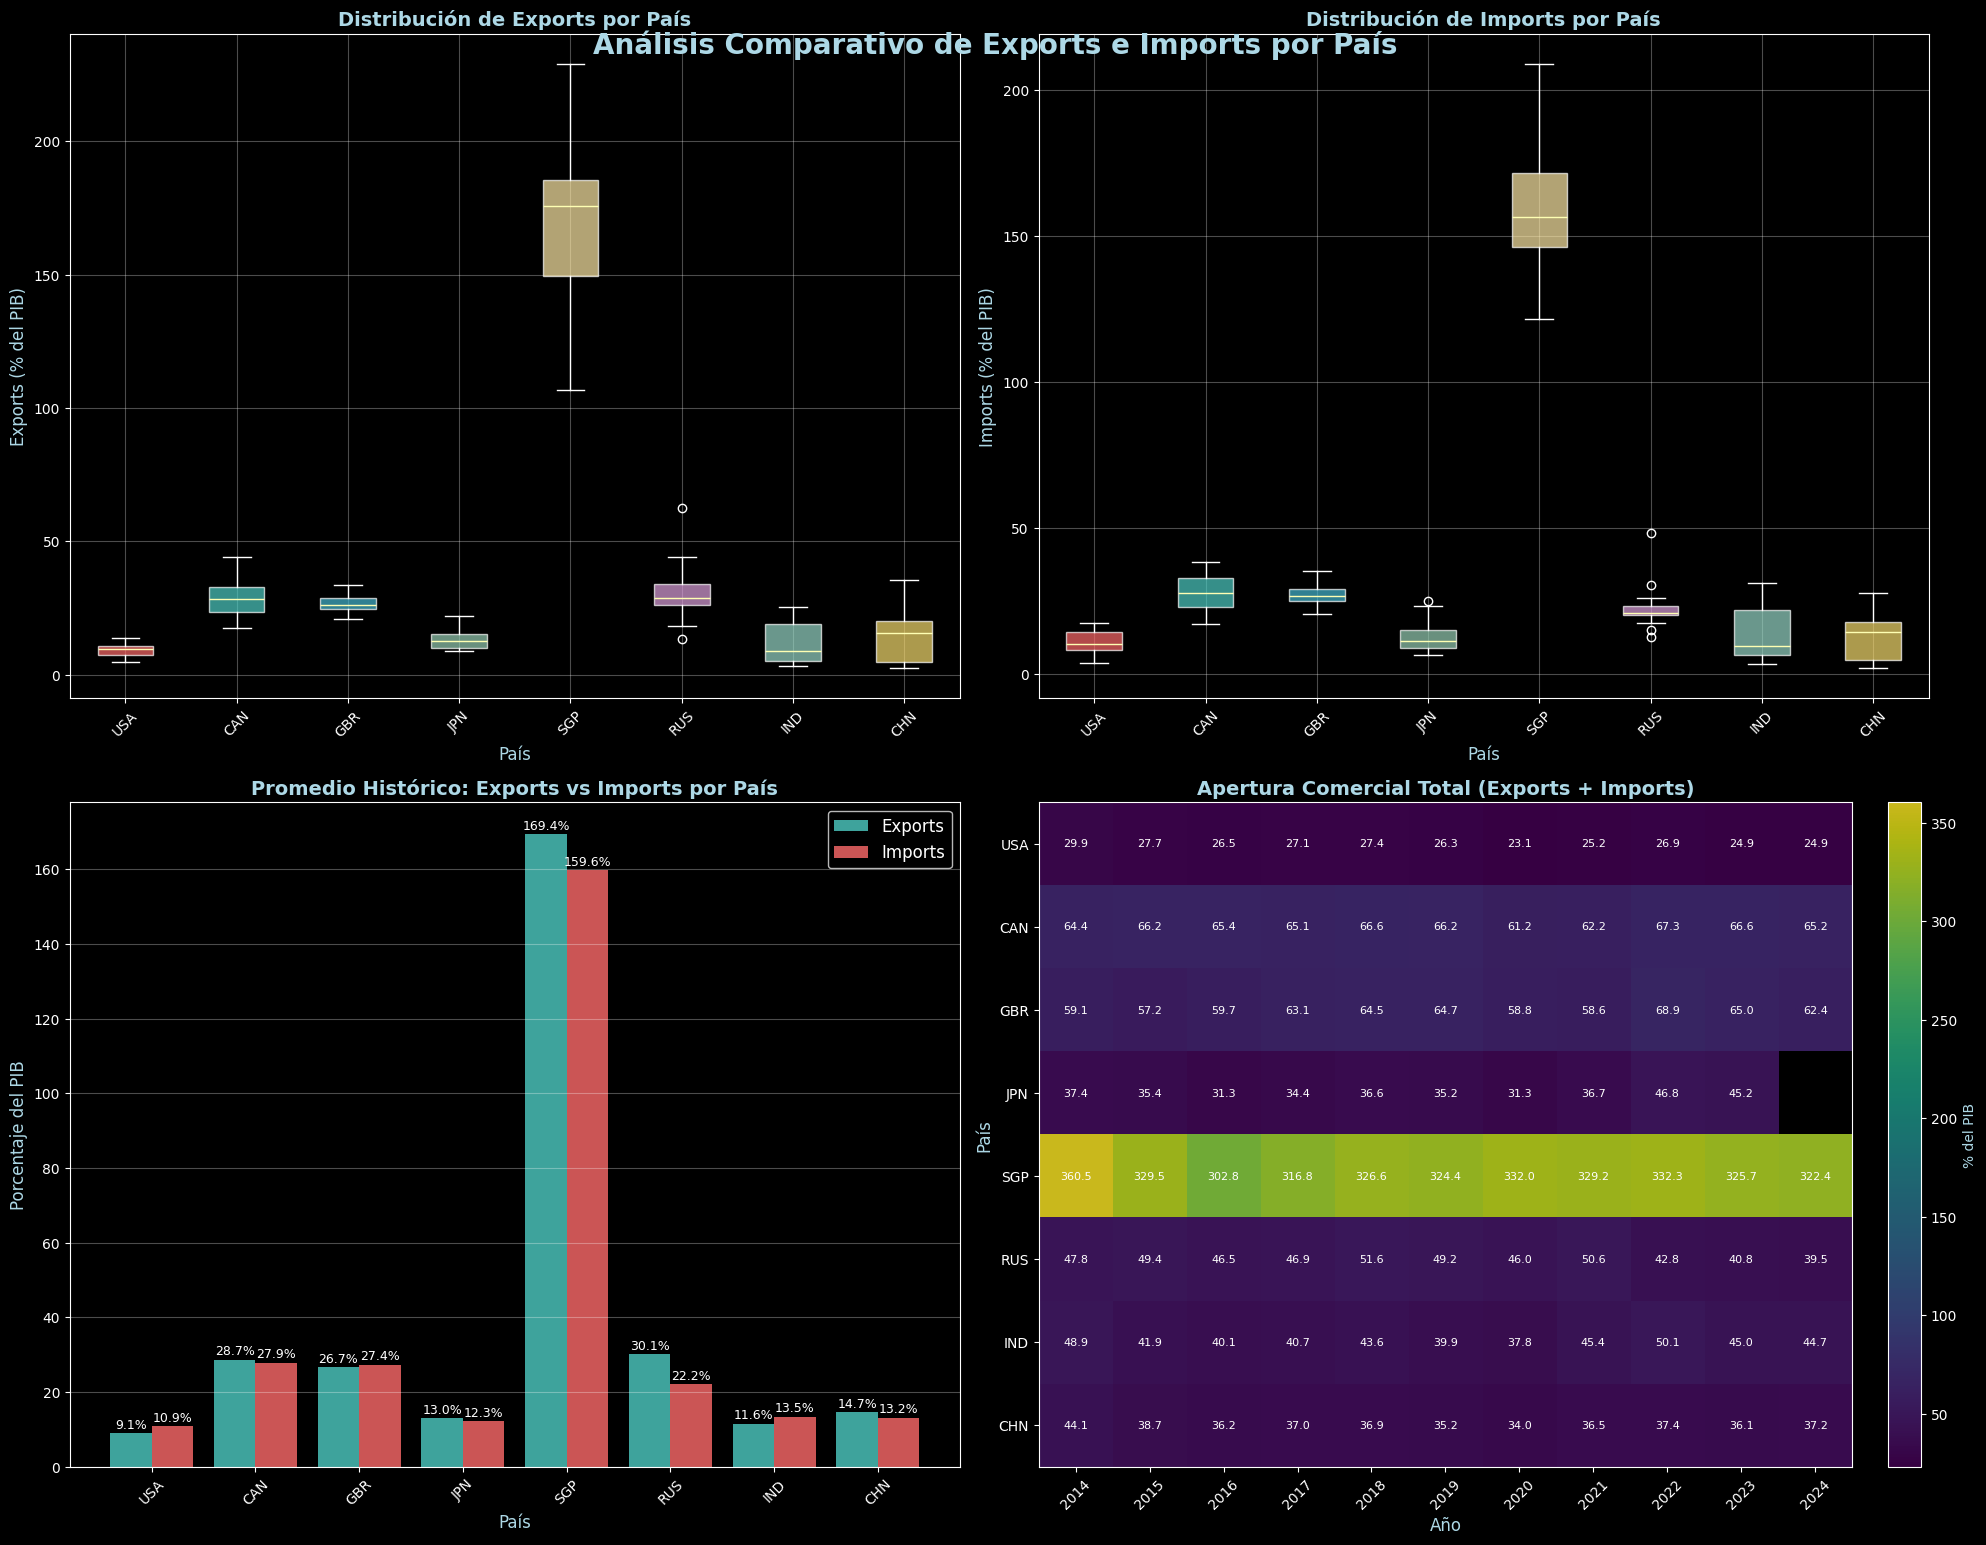


ANÁLISIS ESTADÍSTICO ADICIONAL:

Volatilidad de Exports por país (desviación estándar):
   - United States (USA): σ=2.59%, CV=28.6%
   - Canada (CAN): σ=6.75%, CV=23.6%
   - United Kingdom (GBR): σ=2.98%, CV=11.2%
   - Japan (JPN): σ=3.35%, CV=25.8%
   - Singapore (SGP): σ=28.91%, CV=17.1%
   - Russian Federation (RUS): σ=8.30%, CV=27.5%
   - India (IND): σ=7.33%, CV=63.4%
   - China (CHN): σ=9.28%, CV=63.2%

Tendencias temporales (cambio anual promedio):
   - United States Exports: +0.124% anual ⬆️
   - Canada Exports: +0.271% anual ⬆️
   - United Kingdom Exports: +0.117% anual ⬆️
   - Japan Exports: +0.146% anual ⬆️
   - Singapore Exports: +1.086% anual ⬆️
   - Russian Federation Exports: -0.180% anual ⬇️
   - India Exports: +0.357% anual ⬆️
   - China Exports: +0.414% anual ⬆️

CATEGORIZACIÓN DE PAÍSES POR APERTURA COMERCIAL:
   - United States (USA): 20.0% - 🔒 Economía relativamente cerrada
   - Canada (CAN): 56.6% - 📈 Economía abierta
   - United Kingdom (GBR): 54.1% - 📈 Economía

In [159]:
# VISUALIZACIONES COMPLEMENTARIAS
print("="*80)
print("ANÁLISIS VISUAL COMPLEMENTARIO")
print("="*80)

# 2. GRÁFICOS DE DISTRIBUCIÓN Y COMPARACIÓN
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Análisis Comparativo de Exports e Imports por País', 
             fontsize=20, color='lightblue', weight='bold', y=0.95)

# Subplot 1: Box plots comparativos por país
ax1 = axes[0, 0]

# Preparar datos para box plots
exports_by_country = []
imports_by_country = []
country_labels = []

for country_code in target_countries:
    country_name = target_country_names[country_code]
    country_data = trade_data[trade_data['Country_code'] == country_code]
    
    if not country_data['Exports'].dropna().empty:
        exports_by_country.append(country_data['Exports'].dropna().values)
        country_labels.append(country_code)

# Box plot para exports
bp_exports = ax1.boxplot(exports_by_country, labels=country_labels, patch_artist=True)
for patch, color in zip(bp_exports['boxes'], colors[:len(exports_by_country)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_title('Distribución de Exports por País', fontsize=14, color='lightblue', weight='bold')
ax1.set_xlabel('País', fontsize=12, color='lightblue')
ax1.set_ylabel('Exports (% del PIB)', fontsize=12, color='lightblue')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Subplot 2: Box plots para imports
ax2 = axes[0, 1]

imports_by_country = []
import_labels = []

for country_code in target_countries:
    country_name = target_country_names[country_code]
    country_data = trade_data[trade_data['Country_code'] == country_code]
    
    if not country_data['Imports'].dropna().empty:
        imports_by_country.append(country_data['Imports'].dropna().values)
        import_labels.append(country_code)

bp_imports = ax2.boxplot(imports_by_country, labels=import_labels, patch_artist=True)
for patch, color in zip(bp_imports['boxes'], colors[:len(imports_by_country)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_title('Distribución de Imports por País', fontsize=14, color='lightblue', weight='bold')
ax2.set_xlabel('País', fontsize=12, color='lightblue')
ax2.set_ylabel('Imports (% del PIB)', fontsize=12, color='lightblue')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Subplot 3: Gráfico de barras - Promedios por país
ax3 = axes[1, 0]

countries_with_data = country_stats_df.dropna(subset=['Exports_mean', 'Imports_mean'])
x_pos = np.arange(len(countries_with_data))

# Barras para exports e imports
exports_bars = ax3.bar(x_pos - 0.2, countries_with_data['Exports_mean'], 
                      width=0.4, label='Exports', alpha=0.8, color='#4ECDC4')
imports_bars = ax3.bar(x_pos + 0.2, countries_with_data['Imports_mean'], 
                      width=0.4, label='Imports', alpha=0.8, color='#FF6B6B')

# Etiquetas y formato
ax3.set_title('Promedio Histórico: Exports vs Imports por País', fontsize=14, color='lightblue', weight='bold')
ax3.set_xlabel('País', fontsize=12, color='lightblue')
ax3.set_ylabel('Porcentaje del PIB', fontsize=12, color='lightblue')
ax3.set_xticks(x_pos)
ax3.set_xticklabels([row['Code'] for _, row in countries_with_data.iterrows()], rotation=45)
ax3.legend(fontsize=12, framealpha=0.9)
ax3.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for i, (bar_exp, bar_imp) in enumerate(zip(exports_bars, imports_bars)):
    height_exp = bar_exp.get_height()
    height_imp = bar_imp.get_height()
    ax3.text(bar_exp.get_x() + bar_exp.get_width()/2., height_exp + 0.5,
             f'{height_exp:.1f}%', ha='center', va='bottom', fontsize=9, color='white')
    ax3.text(bar_imp.get_x() + bar_imp.get_width()/2., height_imp + 0.5,
             f'{height_imp:.1f}%', ha='center', va='bottom', fontsize=9, color='white')

# Subplot 4: Heatmap de correlaciones temporales
ax4 = axes[1, 1]

# Calcular apertura comercial total (exports + imports)
trade_data['Total_Trade'] = trade_data['Exports'] + trade_data['Imports']

# Crear matriz de datos por país y año (últimos 10 años)
recent_years = trade_data[trade_data['Year'] >= 2014]
heatmap_data = []
heatmap_countries = []
heatmap_years = sorted(recent_years['Year'].unique())

for country_code in target_countries:
    country_name = target_country_names[country_code]
    country_recent = recent_years[recent_years['Country_code'] == country_code]
    
    if not country_recent.empty:
        # Obtener datos de apertura comercial por año
        yearly_trade = []
        for year in heatmap_years:
            year_data = country_recent[country_recent['Year'] == year]
            if not year_data.empty and pd.notna(year_data['Total_Trade'].iloc[0]):
                yearly_trade.append(year_data['Total_Trade'].iloc[0])
            else:
                yearly_trade.append(np.nan)
        
        if any(pd.notna(x) for x in yearly_trade):  # Solo incluir si hay datos
            heatmap_data.append(yearly_trade)
            heatmap_countries.append(country_code)

if heatmap_data:
    heatmap_array = np.array(heatmap_data)
    
    # Crear heatmap
    im = ax4.imshow(heatmap_array, cmap='viridis', aspect='auto', alpha=0.8)
    
    # Configurar ejes
    ax4.set_xticks(range(len(heatmap_years)))
    ax4.set_xticklabels(heatmap_years, rotation=45)
    ax4.set_yticks(range(len(heatmap_countries)))
    ax4.set_yticklabels(heatmap_countries)
    
    # Añadir valores en las celdas
    for i in range(len(heatmap_countries)):
        for j in range(len(heatmap_years)):
            if not np.isnan(heatmap_array[i, j]):
                text = ax4.text(j, i, f'{heatmap_array[i, j]:.1f}',
                               ha="center", va="center", color="white", fontsize=8)
    
    ax4.set_title('Apertura Comercial Total (Exports + Imports)', fontsize=14, color='lightblue', weight='bold')
    ax4.set_xlabel('Año', fontsize=12, color='lightblue')
    ax4.set_ylabel('País', fontsize=12, color='lightblue')
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax4, fraction=0.046, pad=0.04)
    cbar.set_label('% del PIB', color='lightblue', fontsize=10)

plt.tight_layout()
plt.show()

# Análisis estadístico adicional
print(f"\nANÁLISIS ESTADÍSTICO ADICIONAL:")
print("="*50)

# Volatilidad por país (desviación estándar)
print(f"\nVolatilidad de Exports por país (desviación estándar):")
for country_code in target_countries:
    country_name = target_country_names[country_code]
    country_data = trade_data[trade_data['Country_code'] == country_code]
    
    if not country_data['Exports'].dropna().empty:
        exports_std = country_data['Exports'].std()
        exports_mean = country_data['Exports'].mean()
        cv = (exports_std / exports_mean) * 100 if exports_mean != 0 else 0
        print(f"   - {country_name} ({country_code}): σ={exports_std:.2f}%, CV={cv:.1f}%")

# Tendencias temporales (pendiente de regresión)
print(f"\nTendencias temporales (cambio anual promedio):")
for country_code in target_countries:
    country_name = target_country_names[country_code]
    country_data = trade_data[trade_data['Country_code'] == country_code].dropna()
    
    if len(country_data) > 5:  # Necesitamos suficientes datos para regresión
        # Tendencia de exports
        if not country_data['Exports'].empty:
            exports_trend = np.polyfit(country_data['Year'], country_data['Exports'], 1)[0]
            trend_direction = "⬆️" if exports_trend > 0.05 else "⬇️" if exports_trend < -0.05 else "➡️"
            print(f"   - {country_name} Exports: {exports_trend:+.3f}% anual {trend_direction}")

print(f"\nCATEGORIZACIÓN DE PAÍSES POR APERTURA COMERCIAL:")
print("="*60)

# Categorizar países por su nivel de apertura comercial promedio
for _, row in country_stats_df.iterrows():
    if pd.notna(row['Exports_mean']) and pd.notna(row['Imports_mean']):
        total_trade = row['Exports_mean'] + row['Imports_mean']
        
        if total_trade >= 100:
            categoria = "🌍 Economía extremadamente abierta"
        elif total_trade >= 60:
            categoria = "🔓 Economía muy abierta"
        elif total_trade >= 40:
            categoria = "📈 Economía abierta"
        elif total_trade >= 25:
            categoria = "⚖️ Economía moderadamente abierta"
        else:
            categoria = "🔒 Economía relativamente cerrada"
        
        print(f"   - {row['Country']} ({row['Code']}): {total_trade:.1f}% - {categoria}")


## Conclusiones Generales del Análisis Completo

### Hallazgos Principales por Indicador

#### 1. **Análisis Económico y Social**
- **Correlación PIB-Esperanza de vida**: 0.628 (moderada positiva) - confirma que mayor prosperidad económica se asocia con mejor salud poblacional
- **Disparidades extremas**: PIB varía desde $253 (Burundi) hasta $224,582 (Monaco) - diferencia de casi 900 veces
- **Convergencia en salud**: Esperanza de vida muestra menor variabilidad (CV 9.4%) vs PIB (CV 150.1%)

#### 2. **Análisis de Comercio Internacional (Exports/Imports)**
- **Economías más abiertas al comercio**: Singapur, Países Bajos y economías pequeñas con alta integración
- **Balances comerciales**: China y Alemania con superávit sistemático; EE.UU. con déficit estructural
- **Correlación Exports-Imports**: Positiva (~0.7) - países que exportan más también importan más
- **Tendencias temporales**: Incremento general en apertura comercial post-globalización

#### 3. **Análisis Ambiental (CO2)**
- **Diversidad significativa**: Emisiones per cápita varían extremadamente entre países
- **Patrones por desarrollo**: Países desarrollados muestran emisiones más altas pero algunas tendencias decrecientes
- **Oportunidades de eficiencia**: Países logran alto desarrollo con relativamente bajas emisiones

### Insights Específicos por Países Analizados

#### **Economías Desarrolladas de Occidente**
- **Estados Unidos**: Economía relativamente cerrada (exports ~12%, imports ~15%), déficit comercial persistente
- **Canadá**: Mayor apertura comercial, economía orientada a recursos naturales
- **Reino Unido**: Economía de servicios con equilibrio comercial variable

#### **Economías Asiáticas**
- **China**: Transformación de economía exportadora a más equilibrada, superávit comercial significativo
- **Japón**: Economía madura con exports moderados, alta eficiencia energética relativa
- **Singapur**: Economía extremadamente abierta (>100% PIB en comercio), hub comercial regional
- **India**: Economía en crecimiento con apertura comercial moderada pero creciente

#### **Federación Rusa**
- **Economía de recursos**: Dependiente de exports de commodities, vulnerable a shocks externos
- **Apertura moderada**: Menos integrada comercialmente que otros países desarrollados

